In [1]:
import pandas_datareader as web 
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [31]:
# set paths and create dirs 
base_dir = '../'
helper_dir = os.path.join(base_dir, 'helper')
png_dir = os.path.join(base_dir, 'png')
os.makedirs(png_dir, exist_ok=True)

In [3]:
# load helper functions
%run {helper_dir}/plot.py

## Download Daily Adj Close Prices and Calculate Yearly Returns

In [4]:
# get 10 years of data 
end = dt.datetime.now()
start = dt.datetime(2014, 1, 1) 

In [9]:
assets = ['^GSPC', '^IXIC', 'FREL', 'TIP', 'GLD', 'COMT', 'BTC-USD', 'ETH-USD', 'AVAX-USD', 'SOL-USD', 'LUNA1-USD',
          'ATOM-USD', 'NEAR-USD', 'DOGE-USD', 'UNI1-USD', 'CRV-USD', 'CVX-USD', 'FXS-USD', 'GMX1-USD']
names = {'^GSPC':'S&P 500', '^IXIC':'NASDAQ', 'FREL':'Real Estate', 'TIP':'Inflation-linked Bond', 'GLD':'Gold', 'COMT':'Commodities', 
         'BTC-USD':'BTC', 'ETH-USD':'ETH', 'AVAX-USD':'AVAX', 'SOL-USD':'SOL', 'LUNA1-USD':'LUNC', 'ATOM-USD':'ATOM', 'NEAR-USD':'NEAR', 
         'DOGE-USD':'DOGE', 'UNI1-USD':'UNI', 'CRV-USD':'CRV', 'CVX-USD':'CVX', 'FXS-USD':'FXS', 'GMX1-USD':'GMX'}

In [6]:
prices = web.get_data_yahoo(assets, start, end)['Adj Close']

In [7]:
returns = prices.pct_change().resample('Y').agg(lambda x: (x+1).prod()-1)
returns = returns.loc['2014-12-31':,]
returns.head()

Symbols,^GSPC,^IXIC,FREL,TIP,GLD,COMT,BTC-USD,...,NEAR-USD,DOGE-USD,UNI1-USD,CRV-USD,CVX-USD,FXS-USD,GMX1-USD
Date,,,,,,,,,,,,,,,
2014-12-31,0.1139,0.1340,0.0000,0.0359,-0.0219,-0.1763,-0.2999,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-12-31,-0.0073,0.0573,-0.0473,-0.0175,-0.1067,-0.3036,0.3447,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2016-12-31,0.0954,0.0750,0.0660,0.0468,0.0803,0.2101,1.2383,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2017-12-31,0.1942,0.2824,0.0886,0.0292,0.1281,0.1170,13.6890,...,0.0000,5.3406,0.0000,0.0000,0.0000,0.0000,0.0000
2018-12-31,-0.0624,-0.0388,-0.0452,-0.0143,-0.0194,-0.0667,-0.7356,...,0.0000,-0.7385,0.0000,0.0000,0.0000,0.0000,0.0000


## Visualize Yearly Returns

### Compare assets for each year

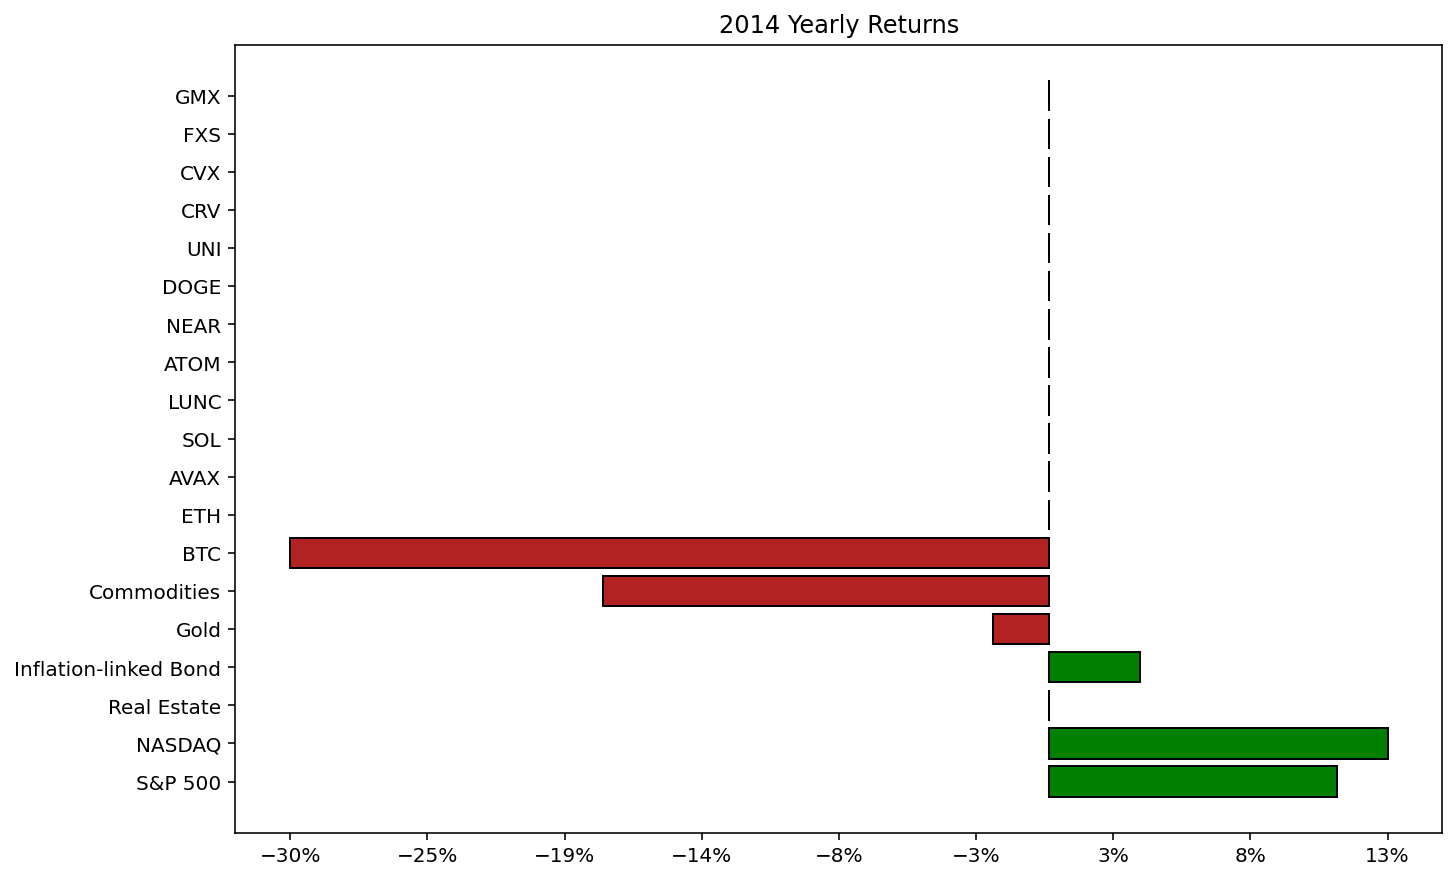

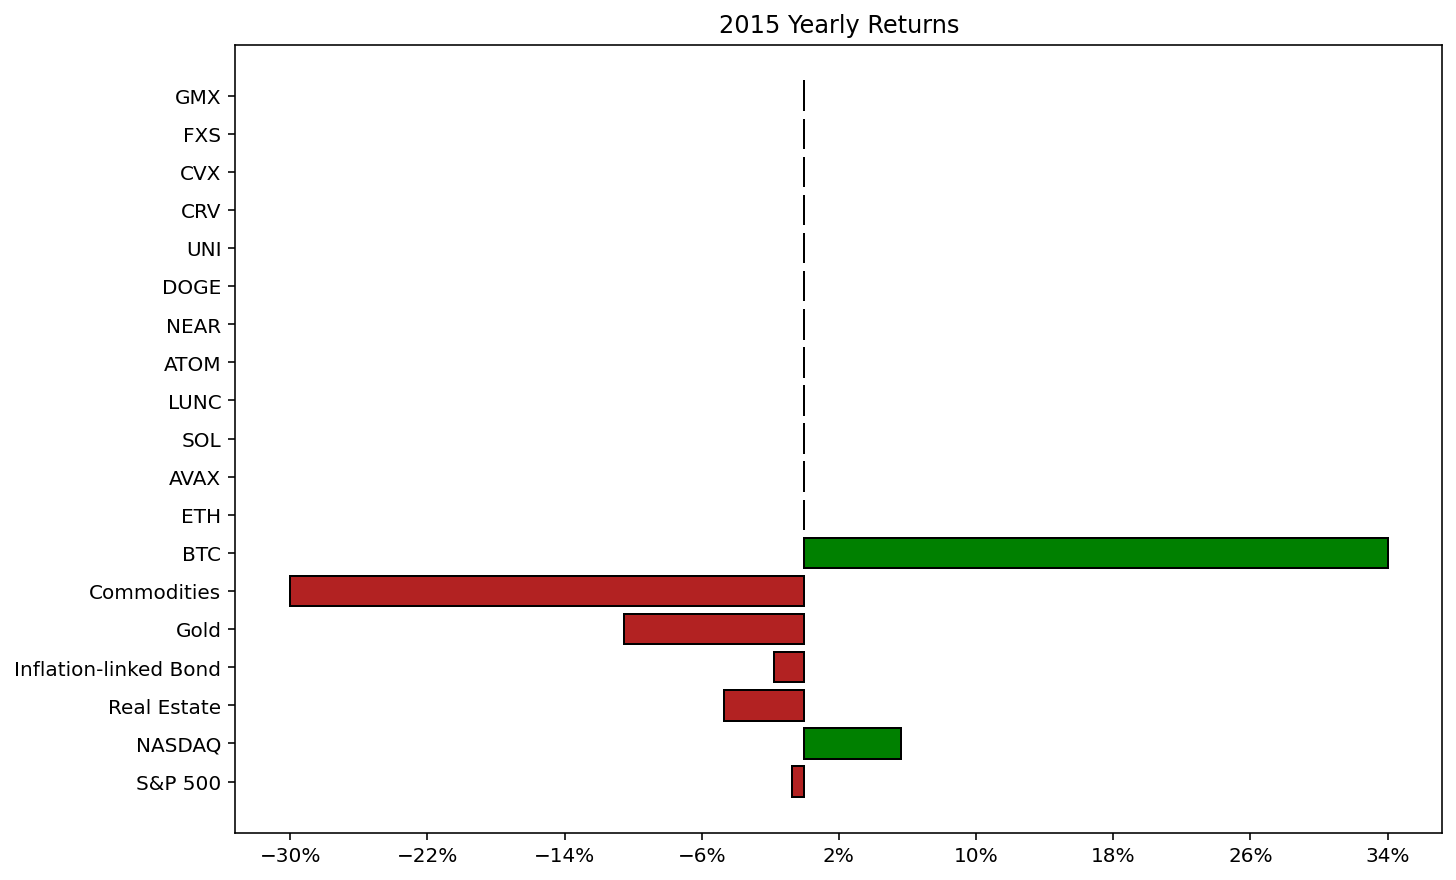

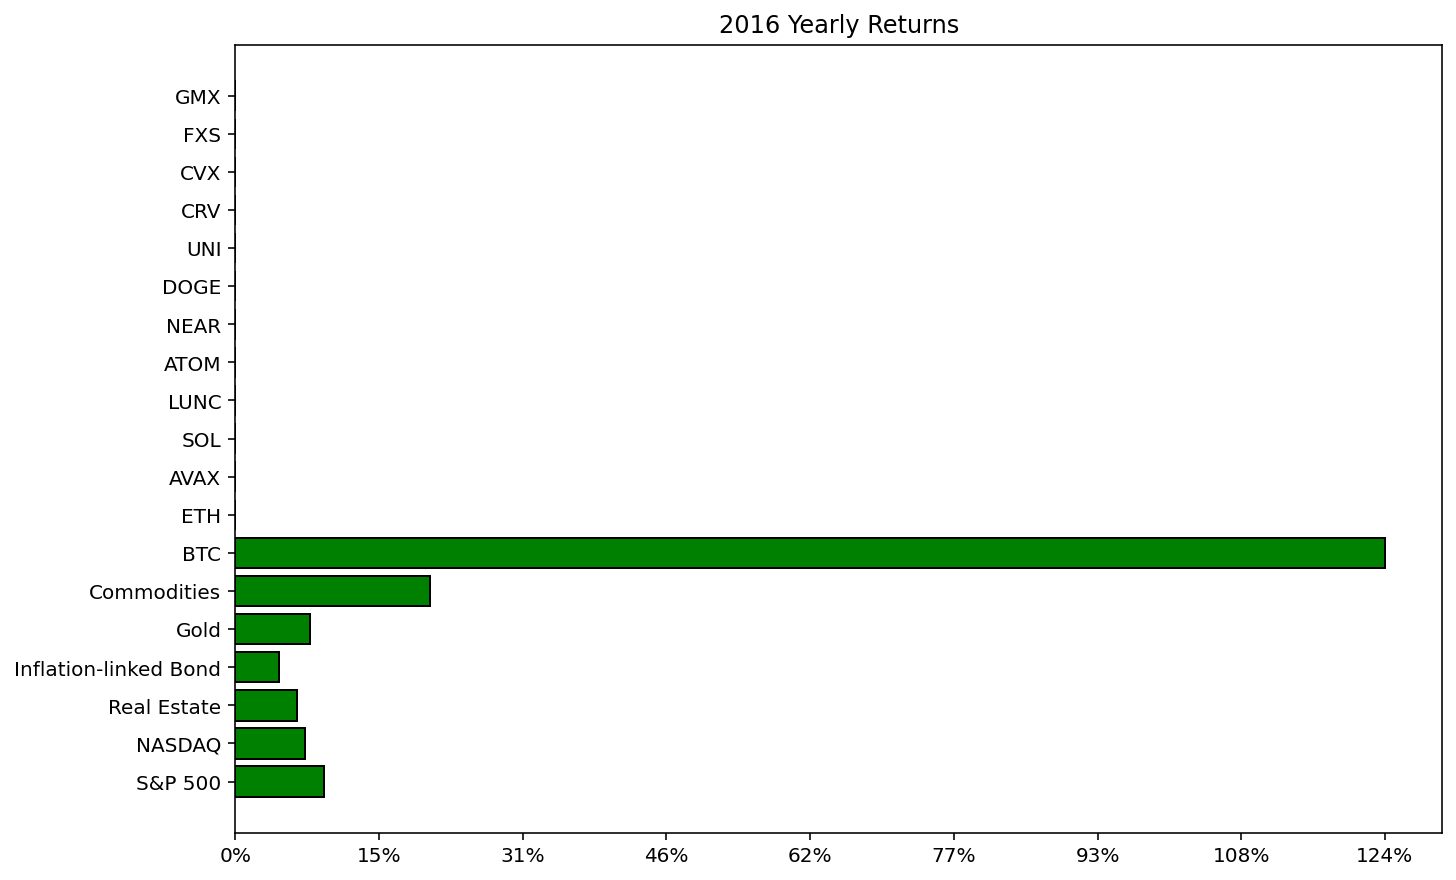

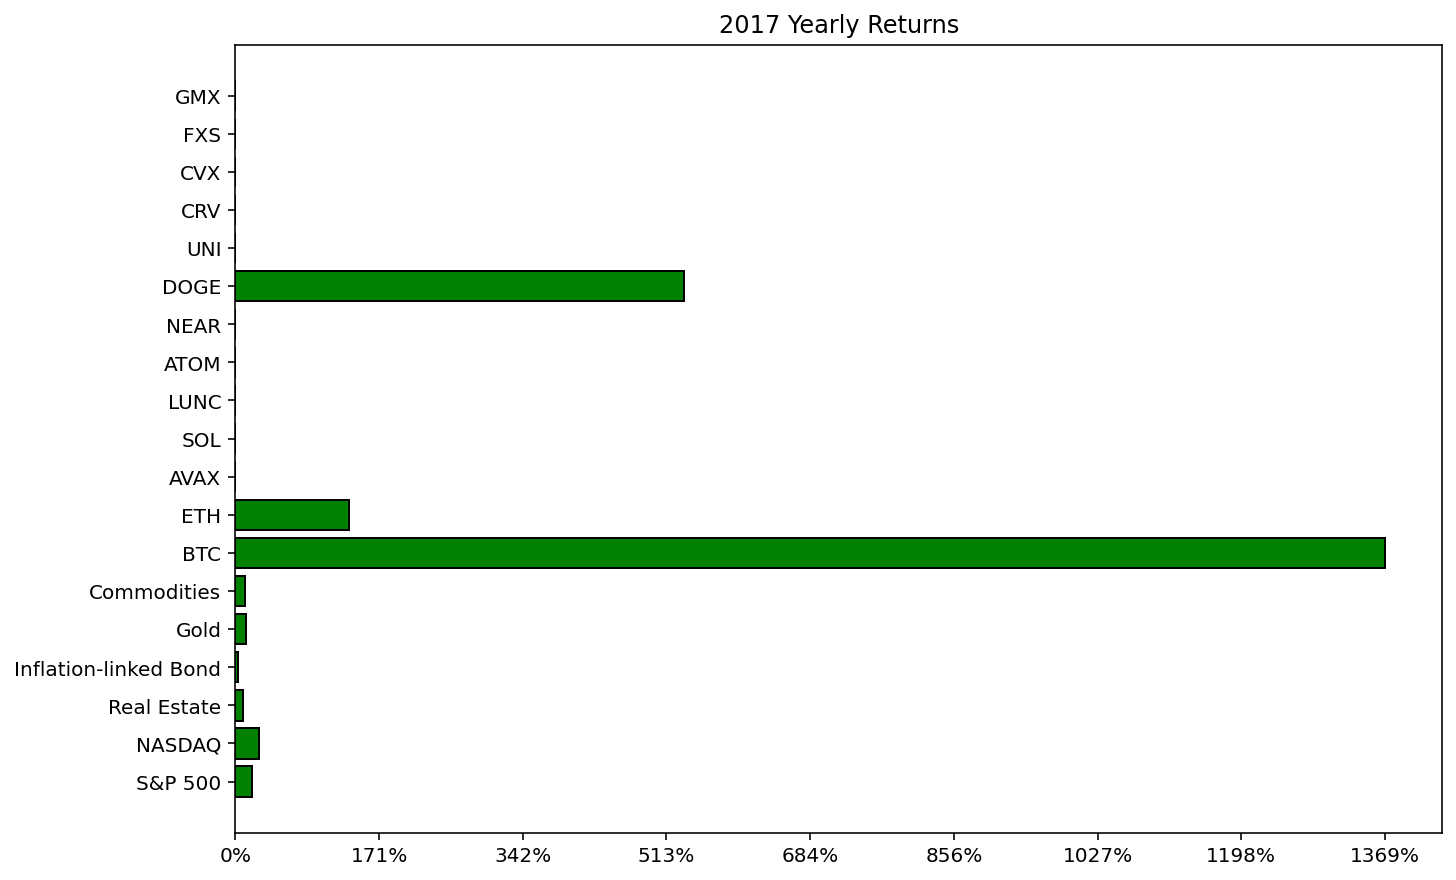

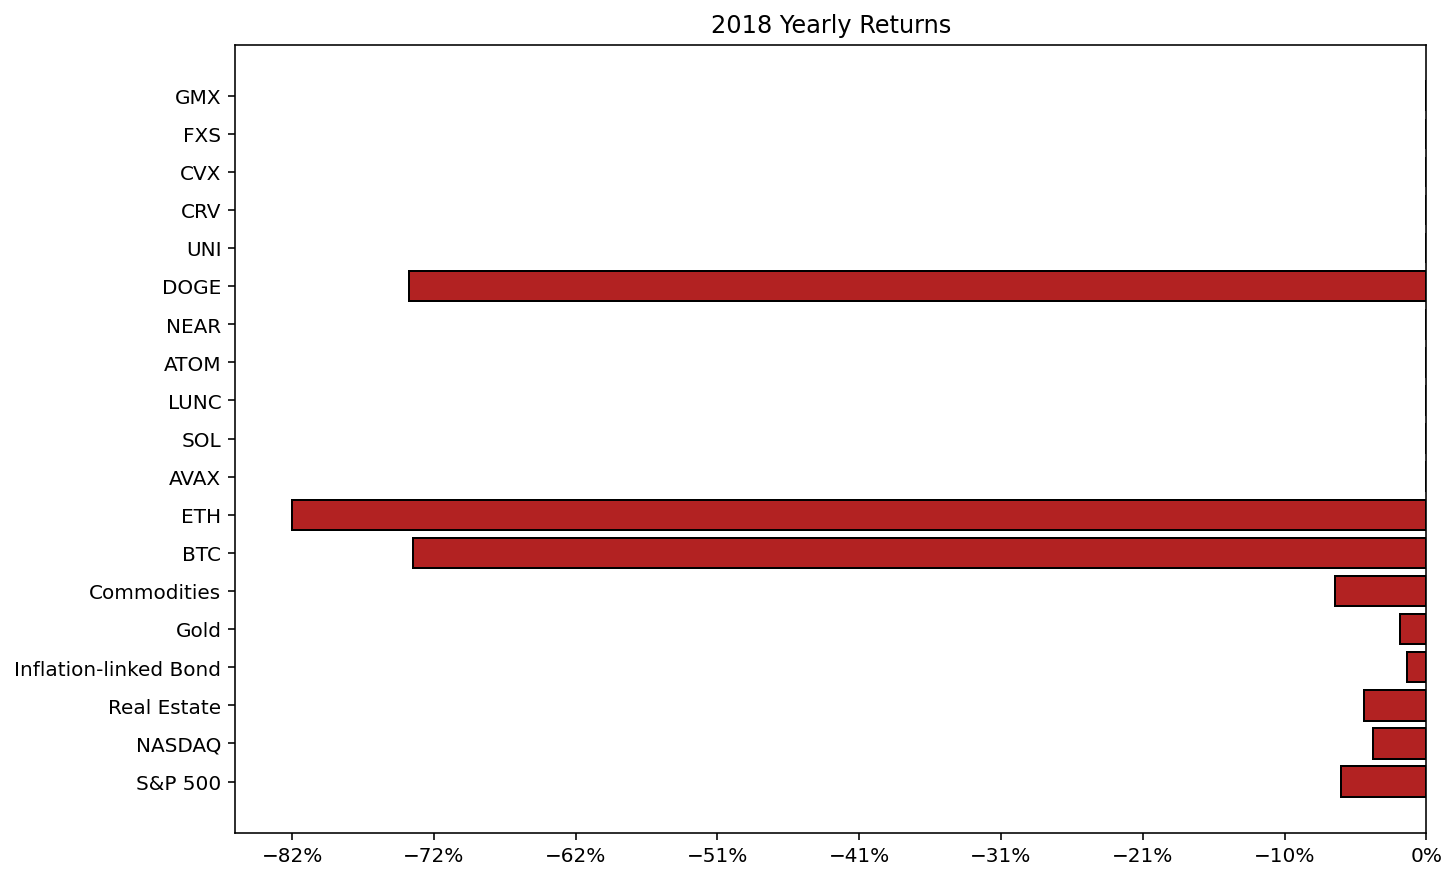

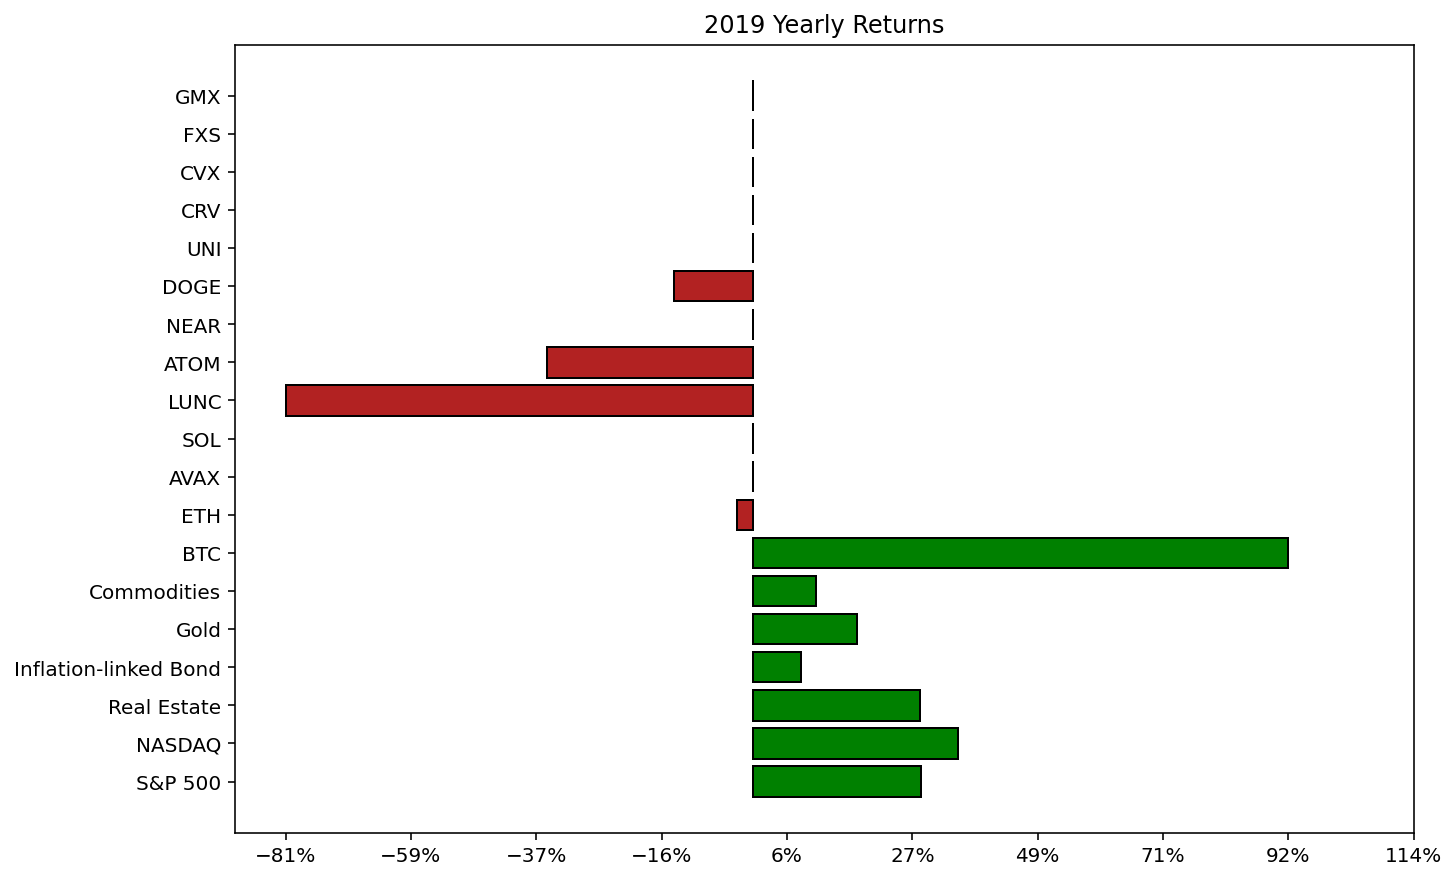

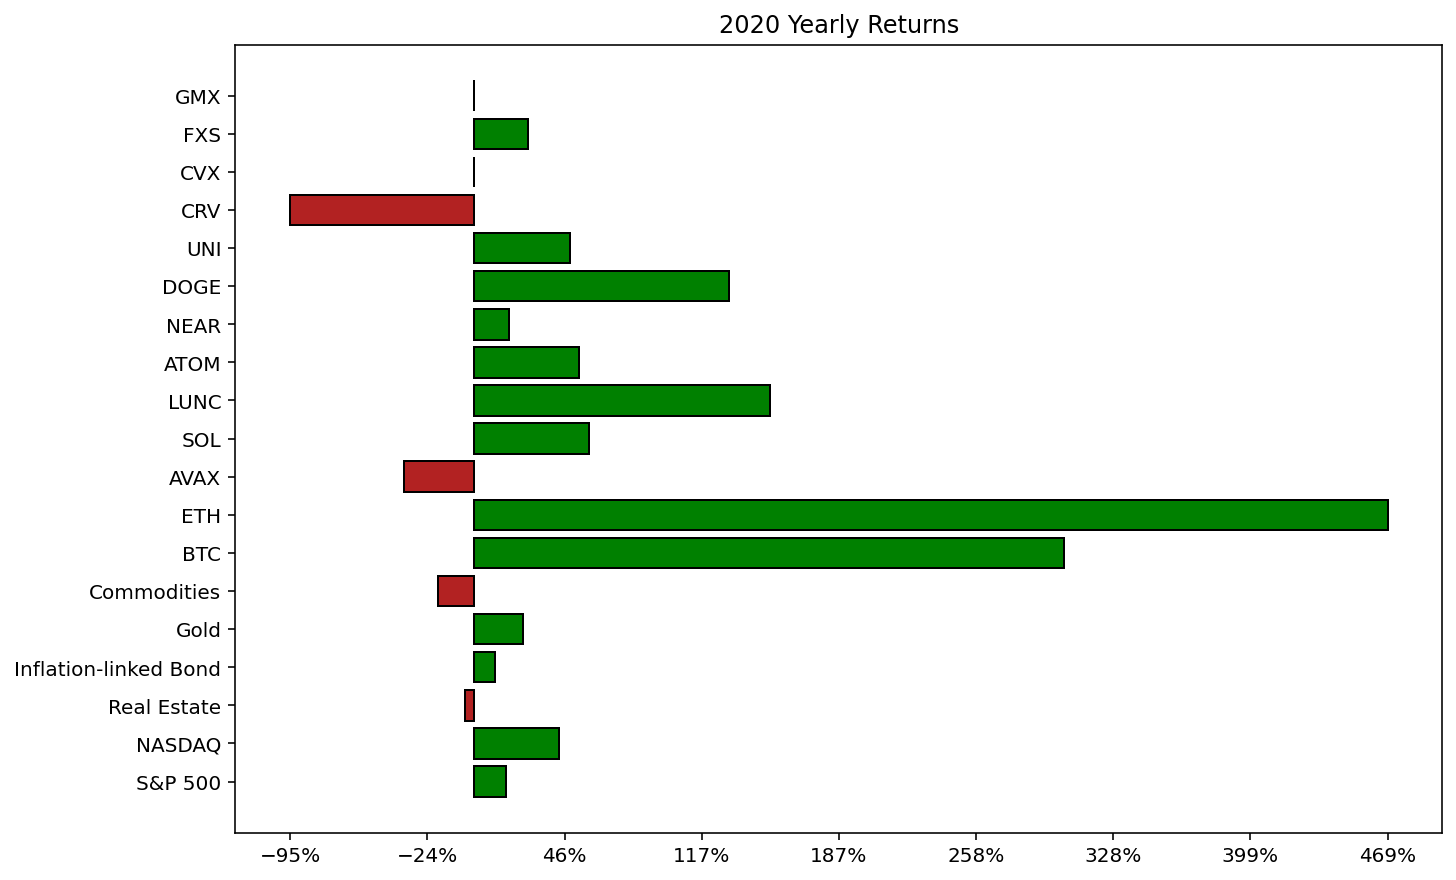

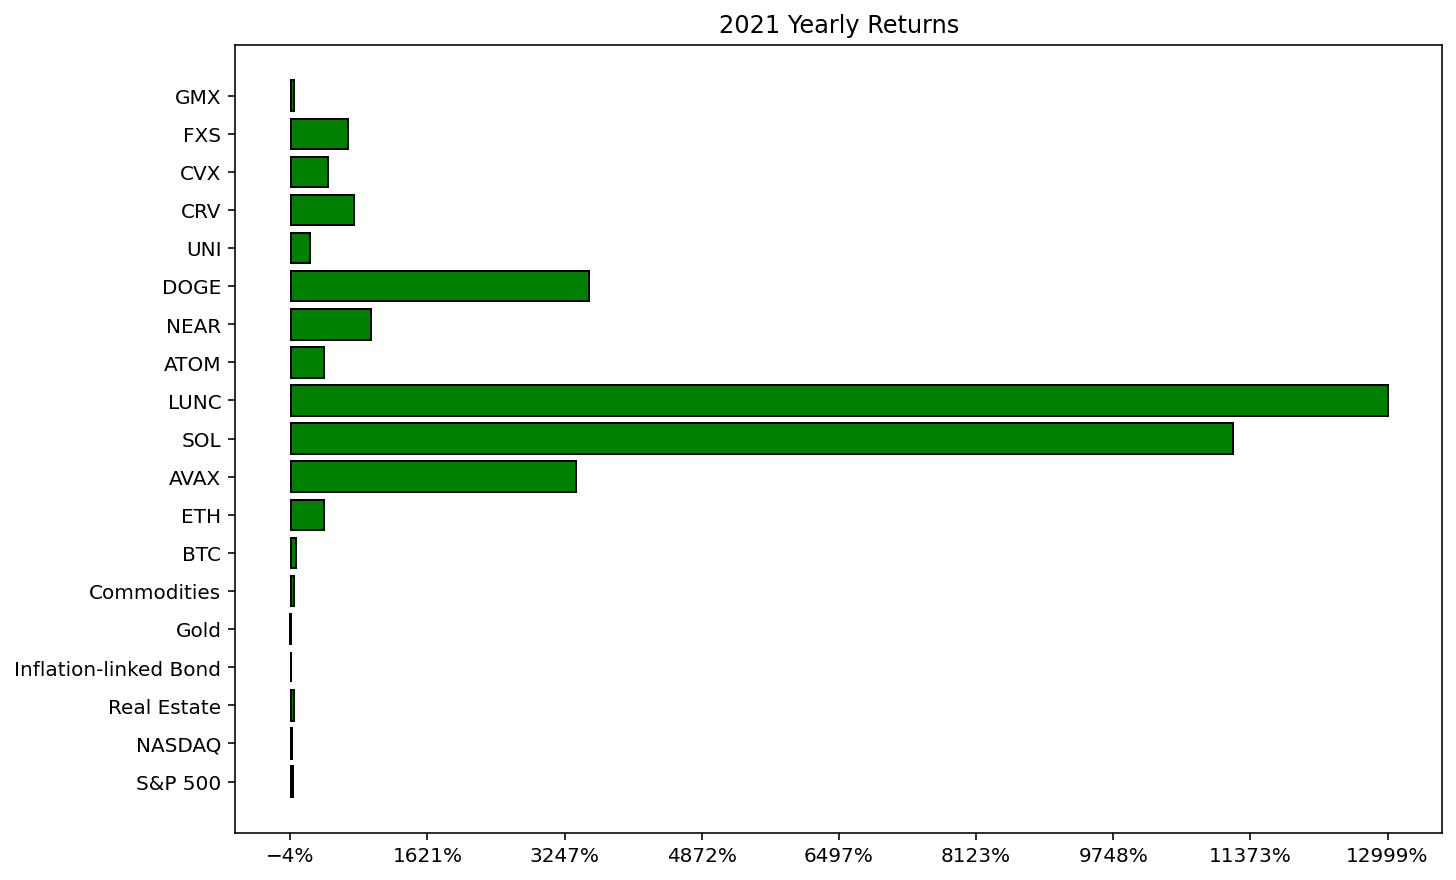

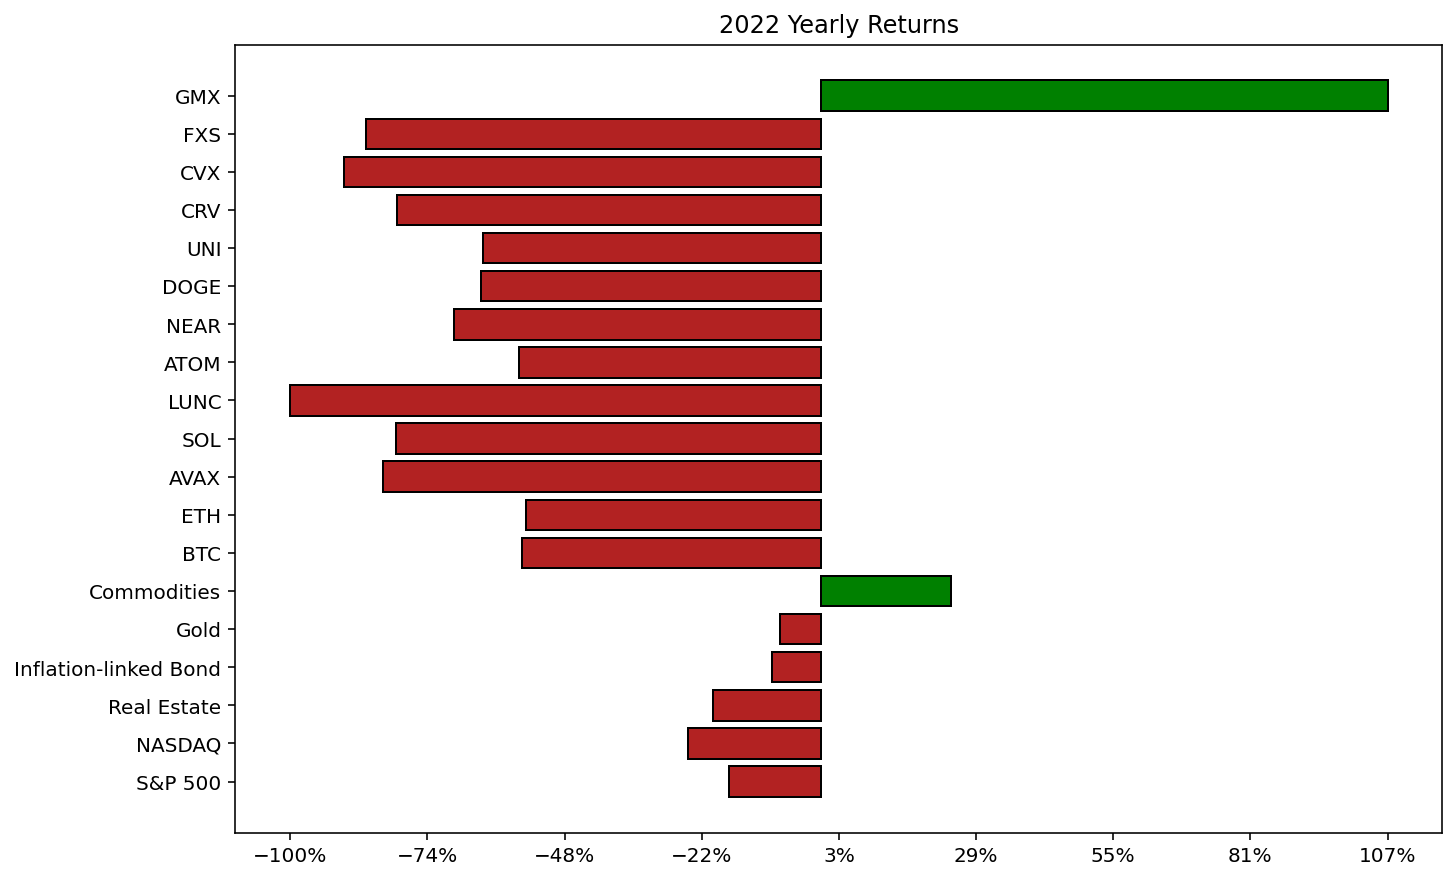

In [32]:
for idx in returns.index:
    # idx = returns.index[-1]
    
    # let's put the returns on x-axis
    x = returns.loc[idx,:]
    x.name = ''
    # let's put the tickers on y-axis
    y = pd.Series([names[ticker] for ticker in x.index])
    y.name = ''
    # make horizontal bar plot
    fig_tit = f'{idx.year} Yearly Returns'
    ax = mk_barploth(x, y, title=fig_tit)
    plt.savefig(os.path.join(png_dir, fig_tit+'.png'), dpi=300)

### Look at the returns over the years for each asset

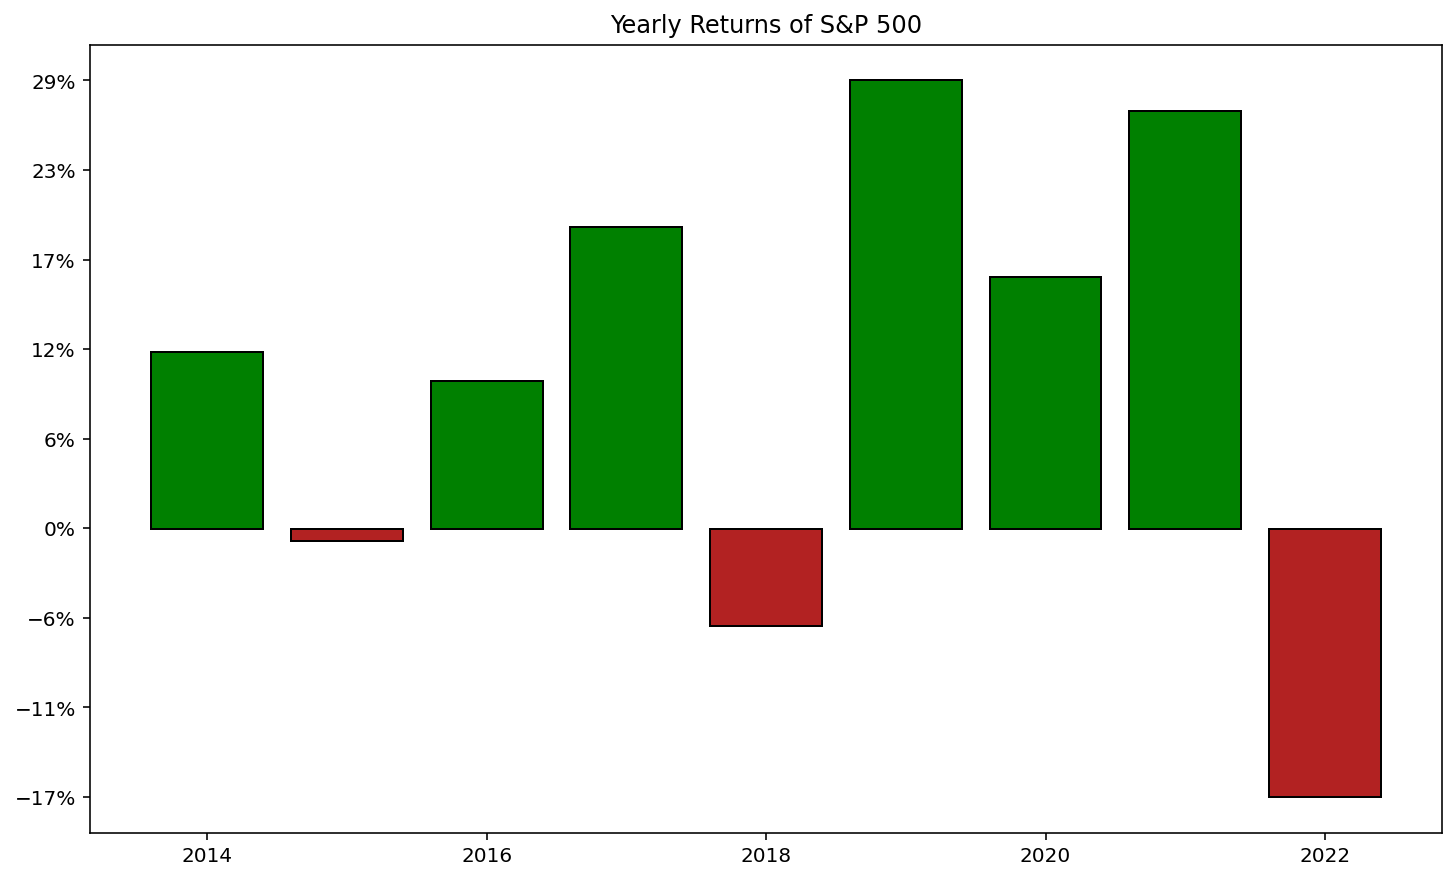

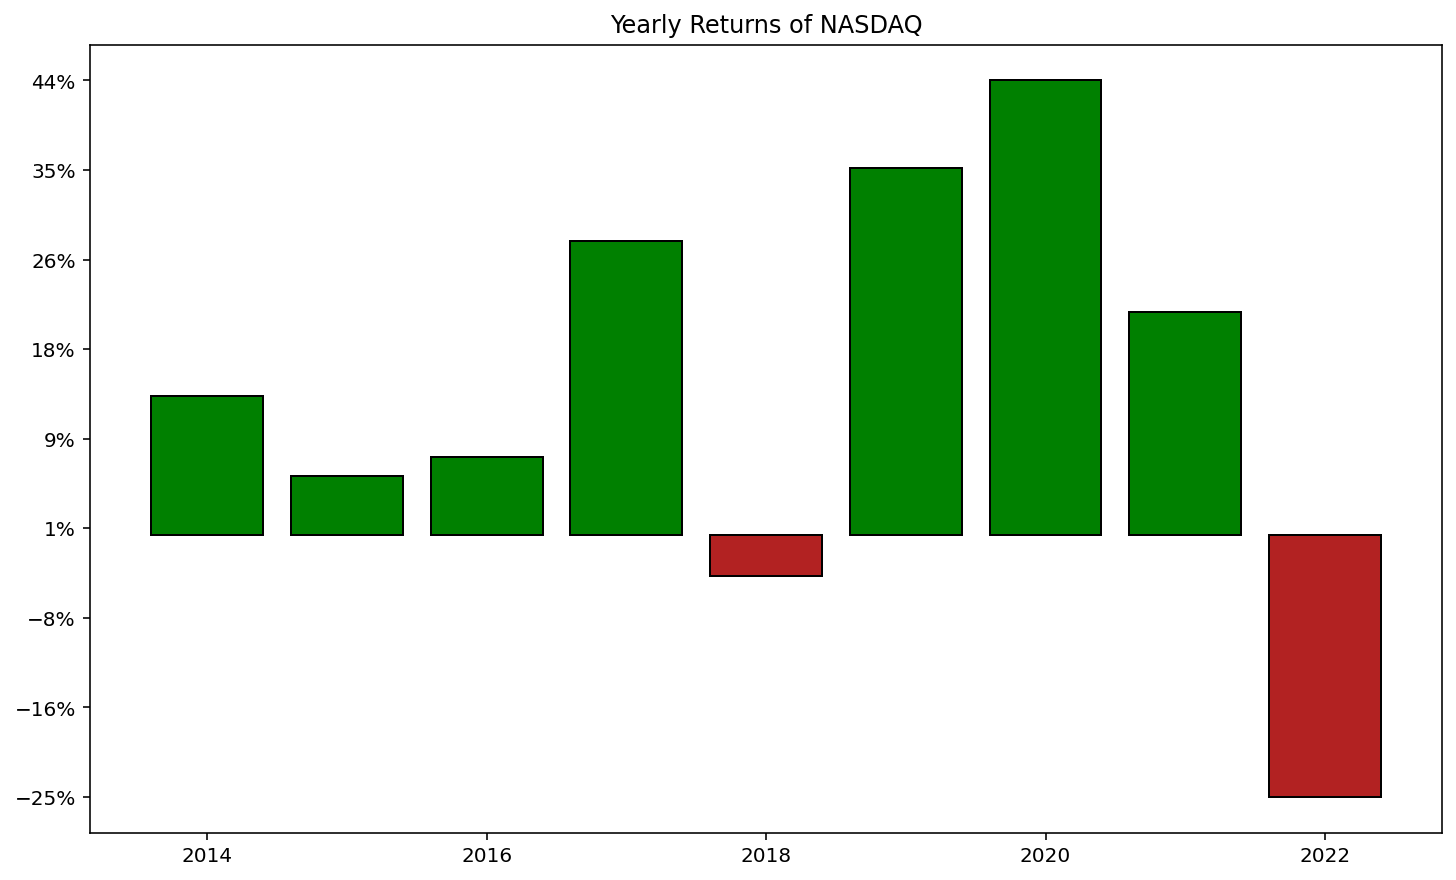

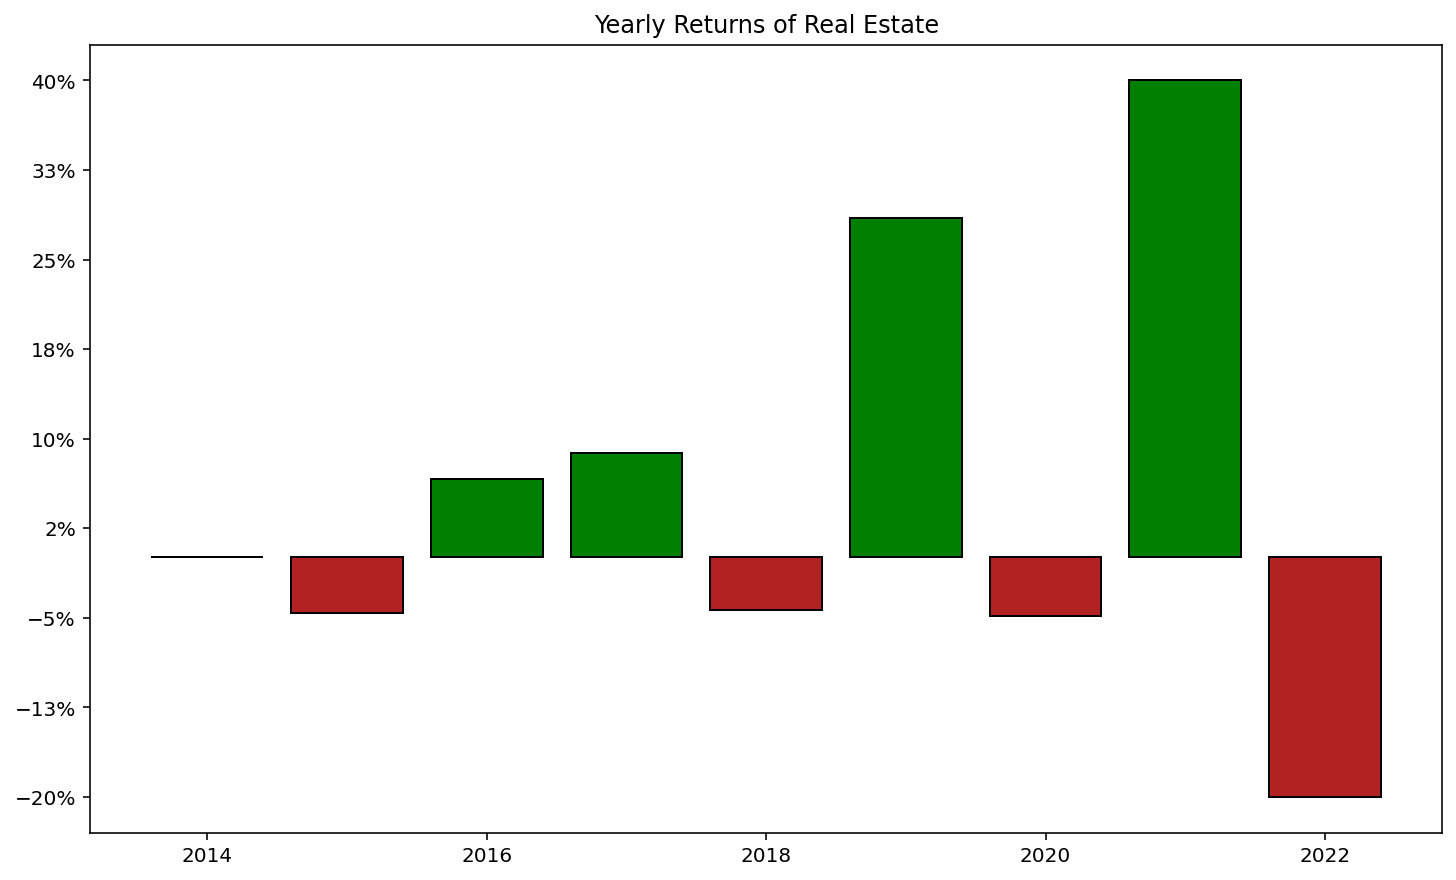

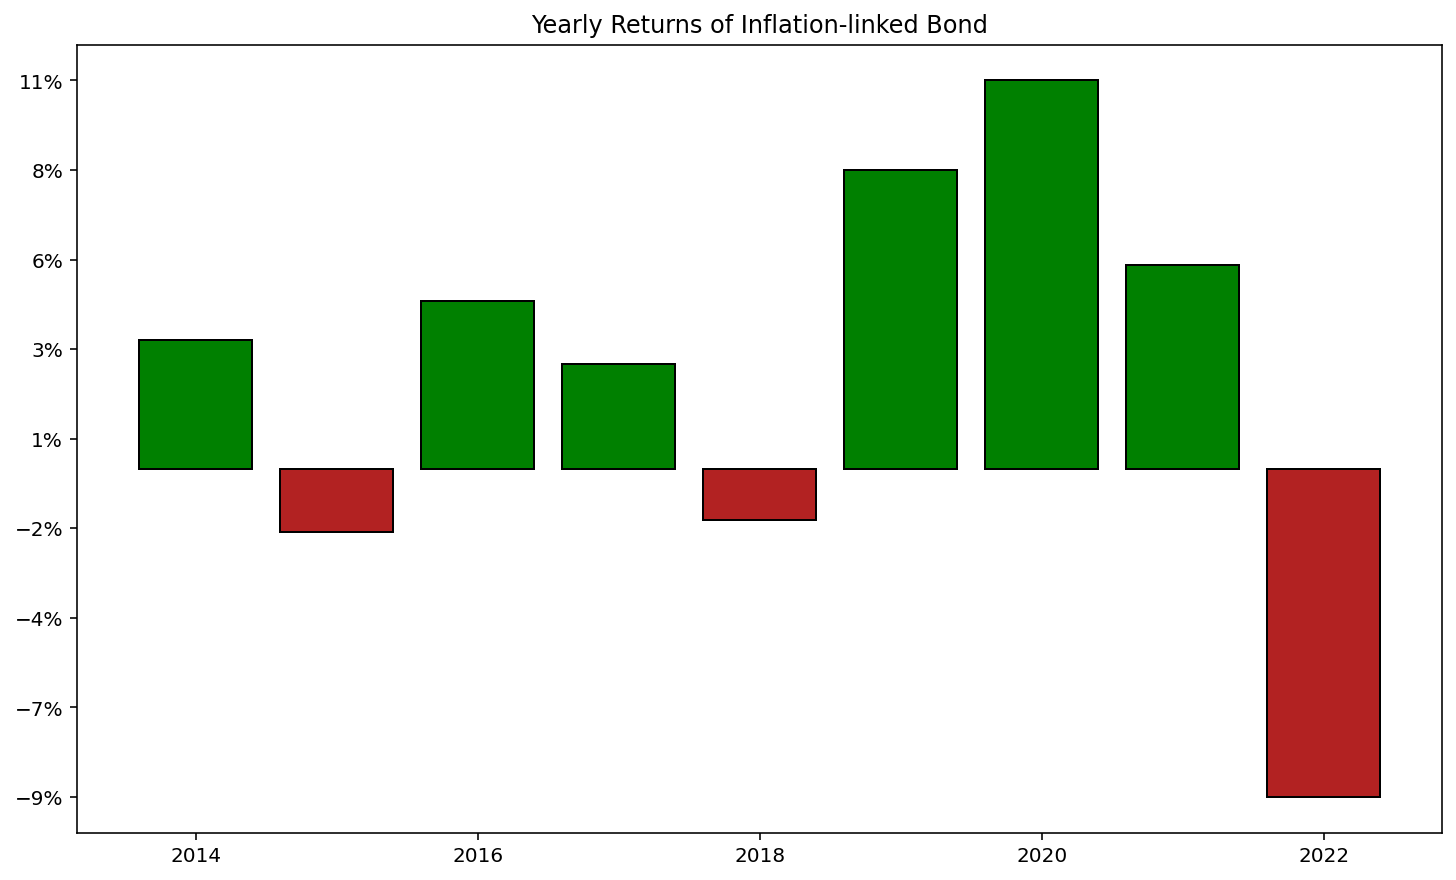

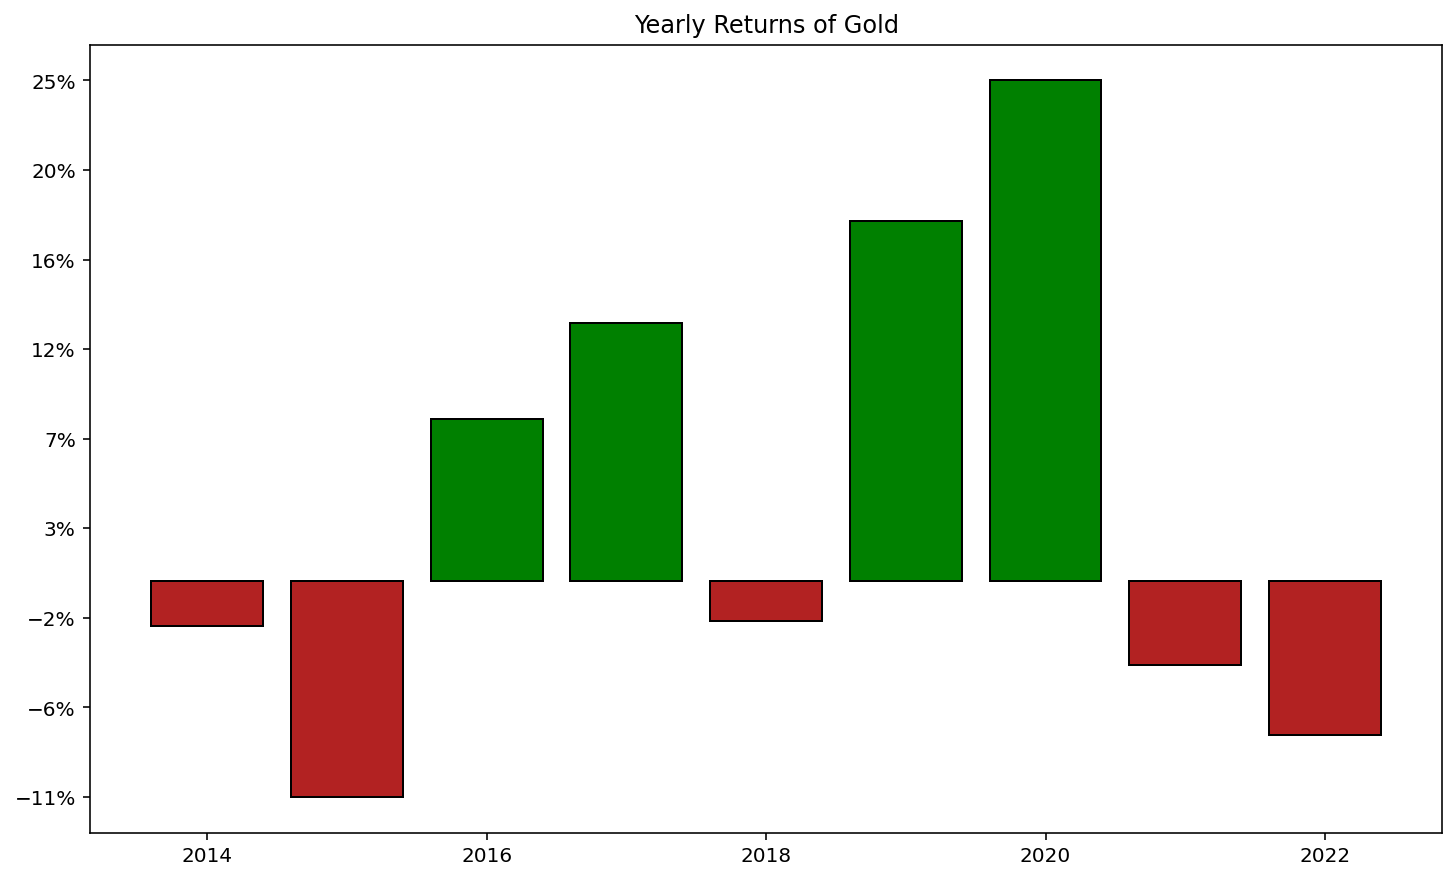

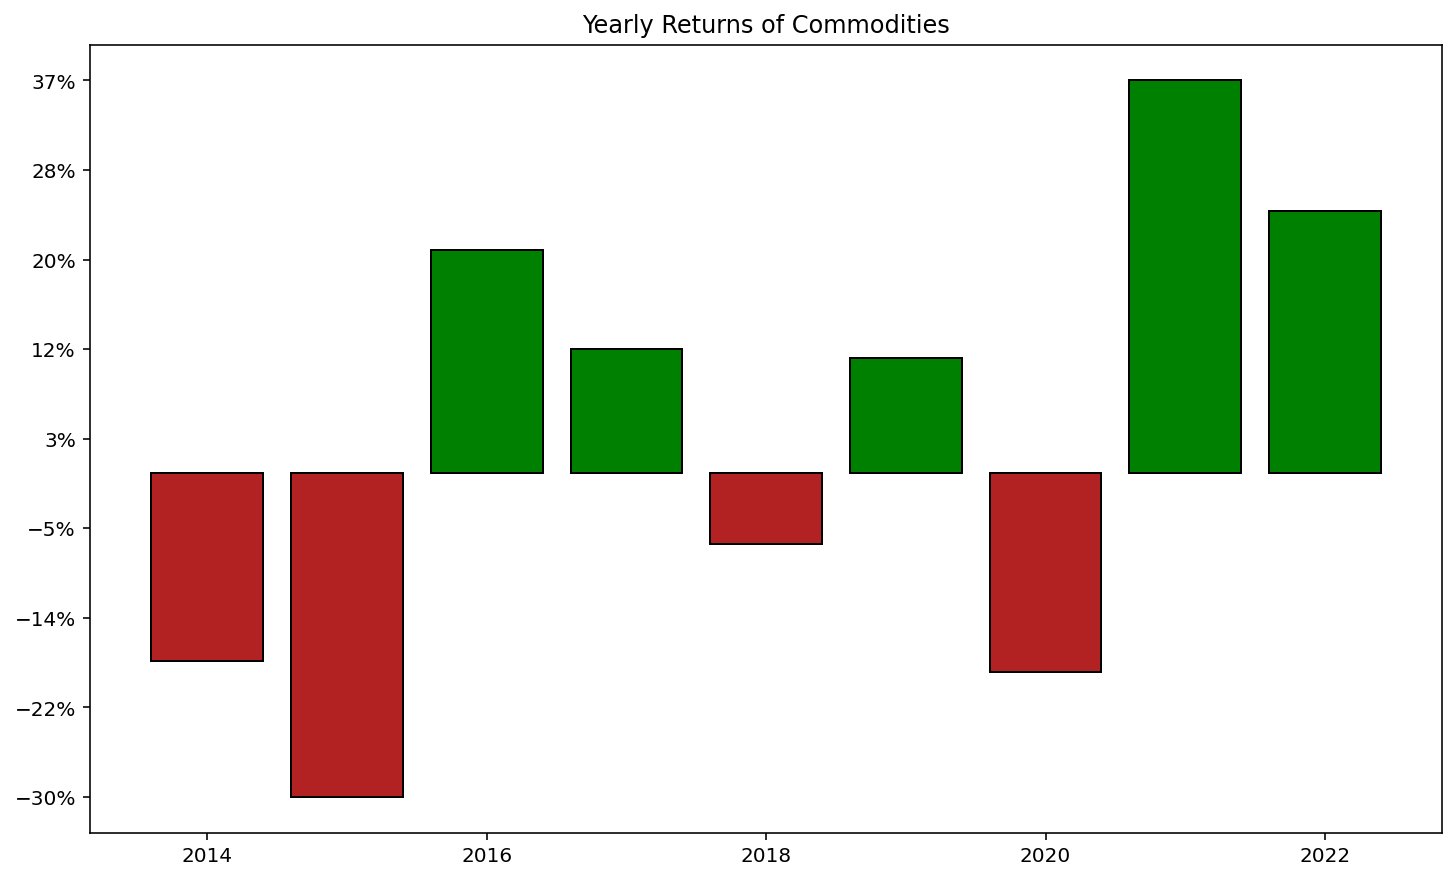

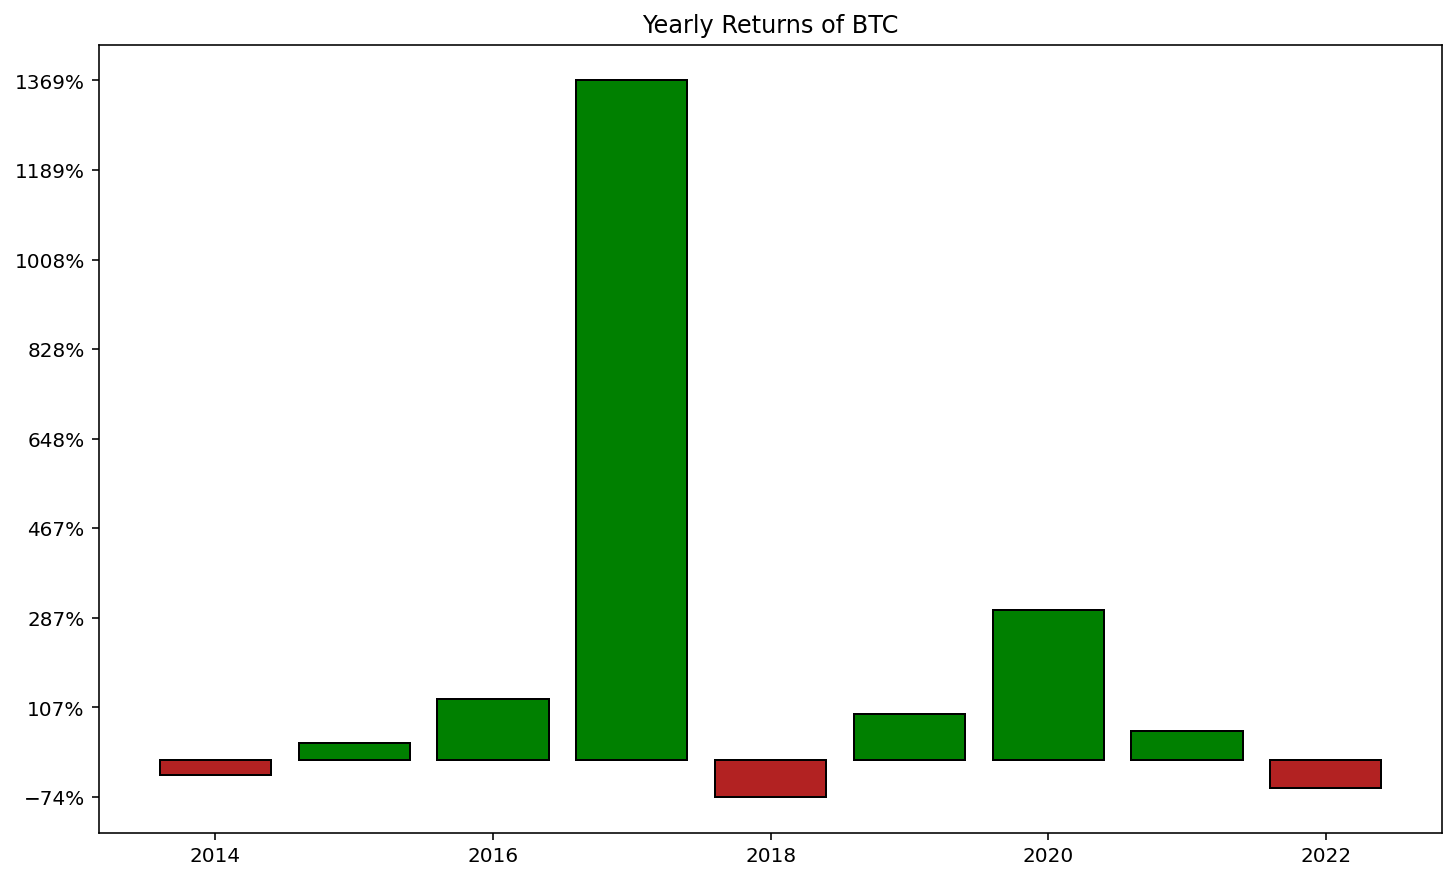

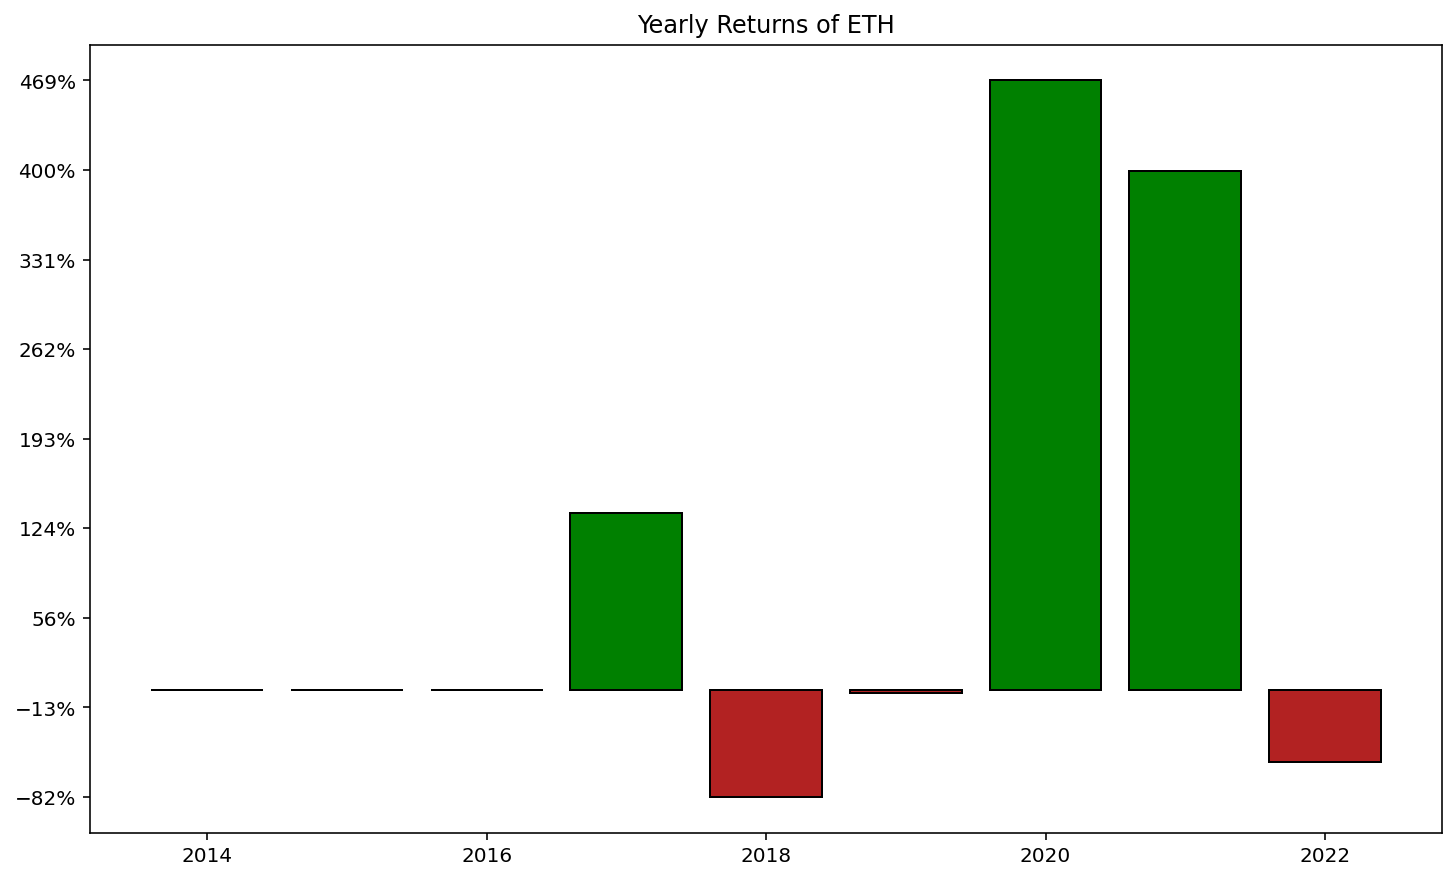

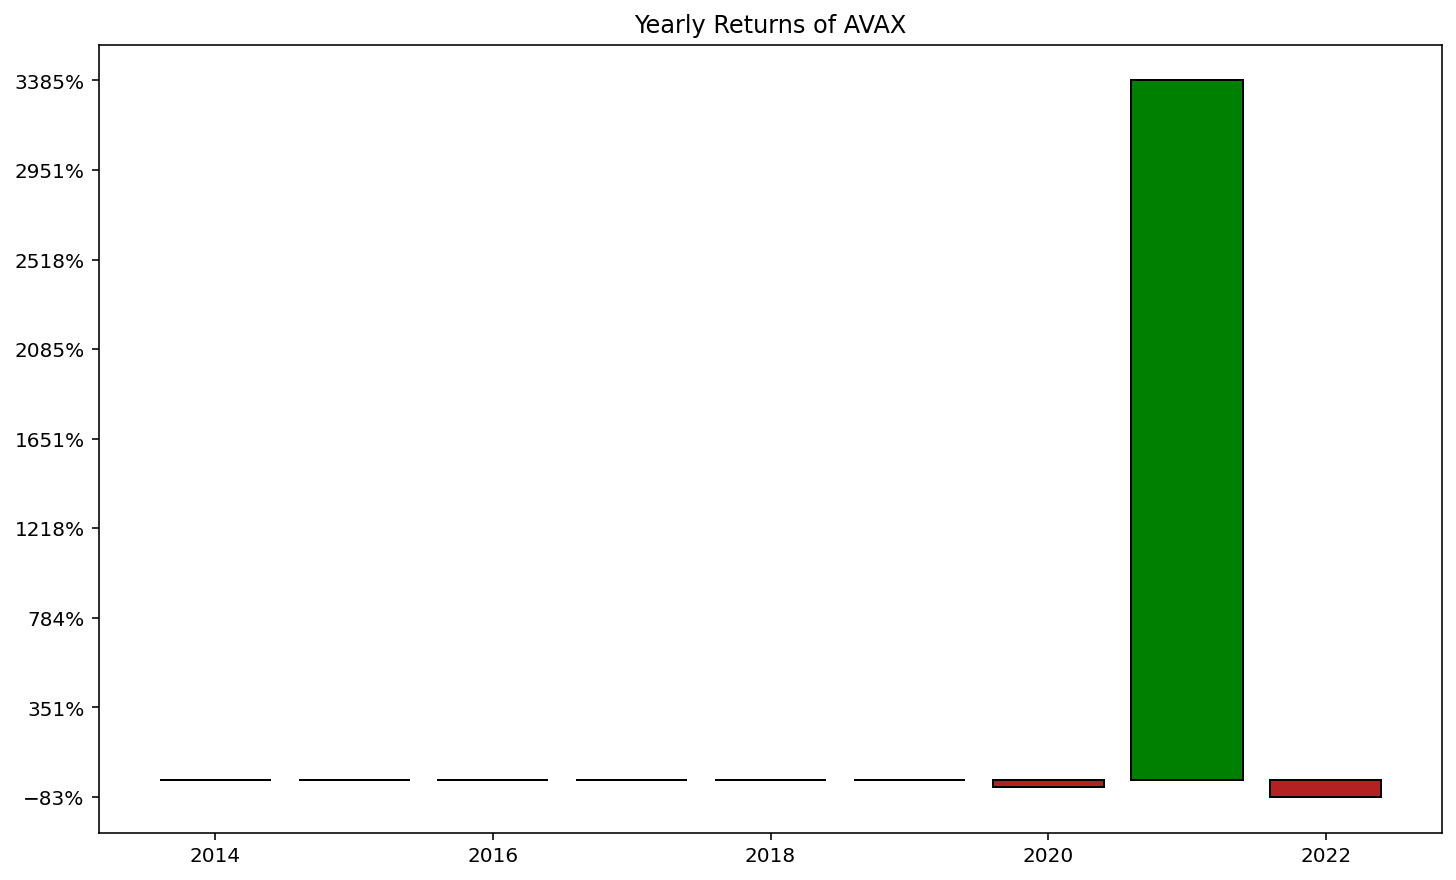

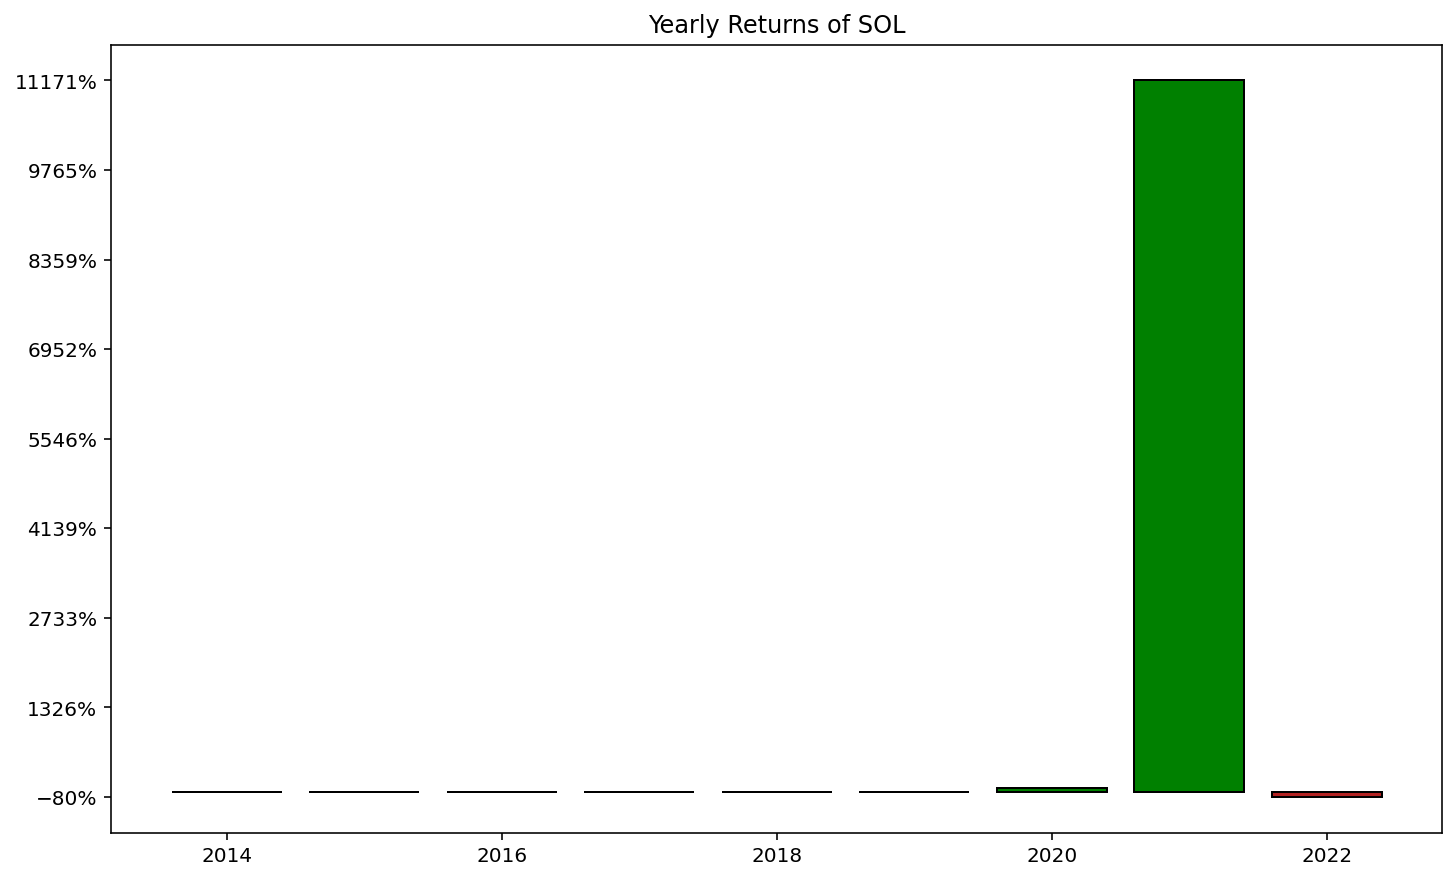

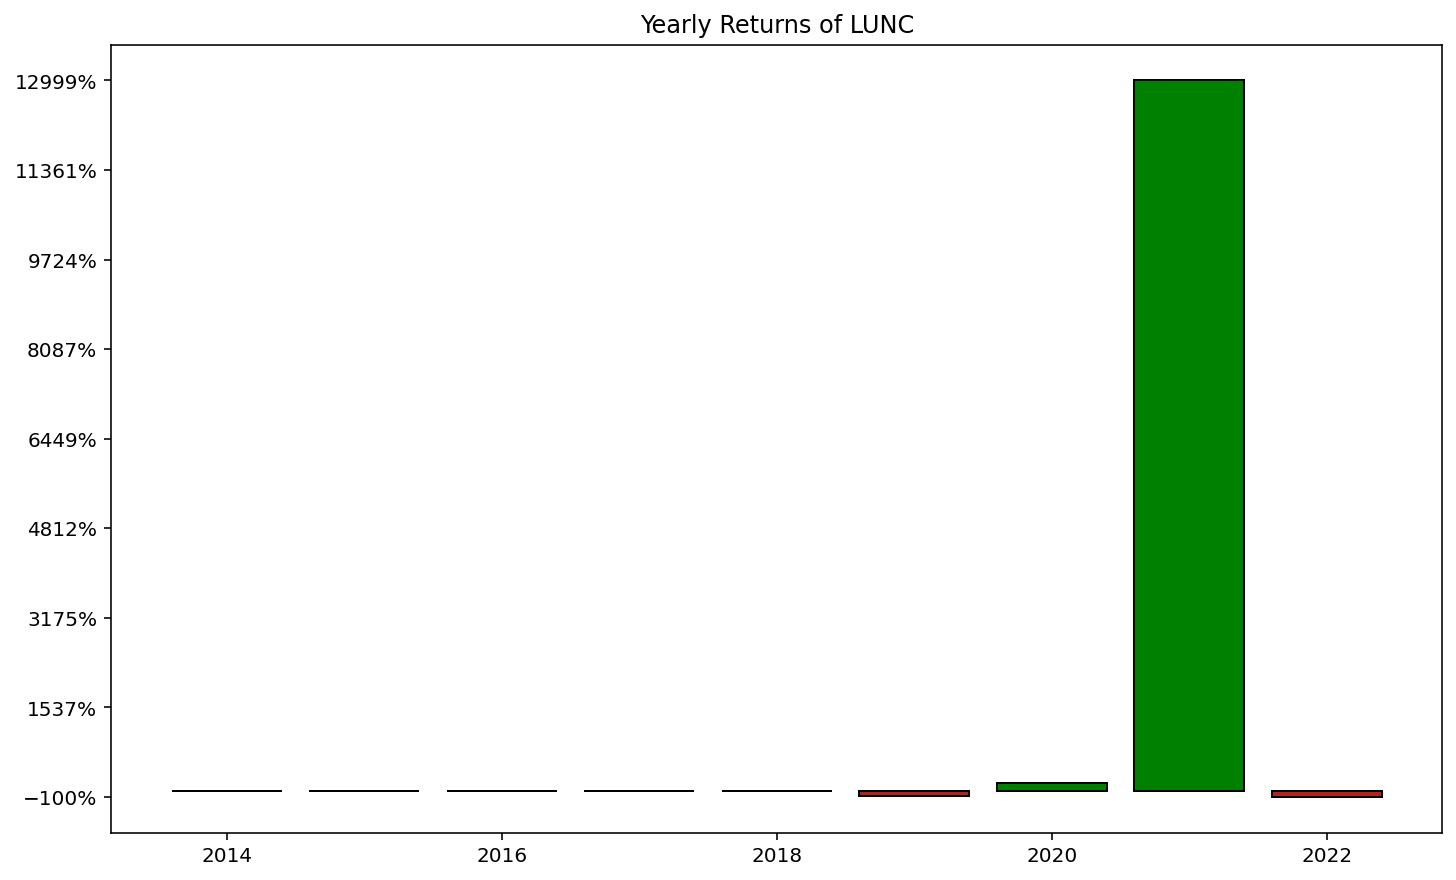

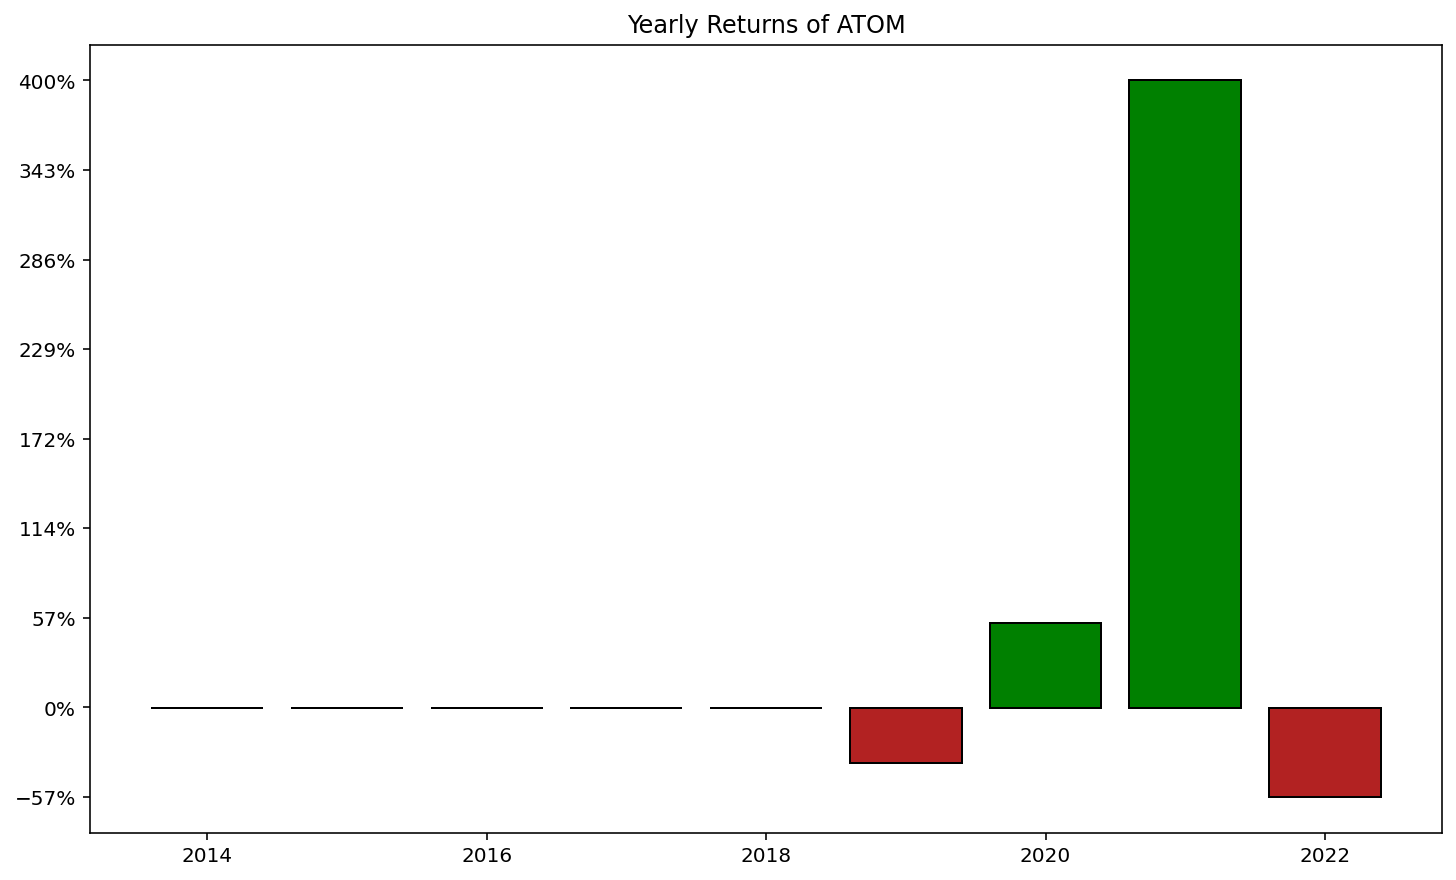

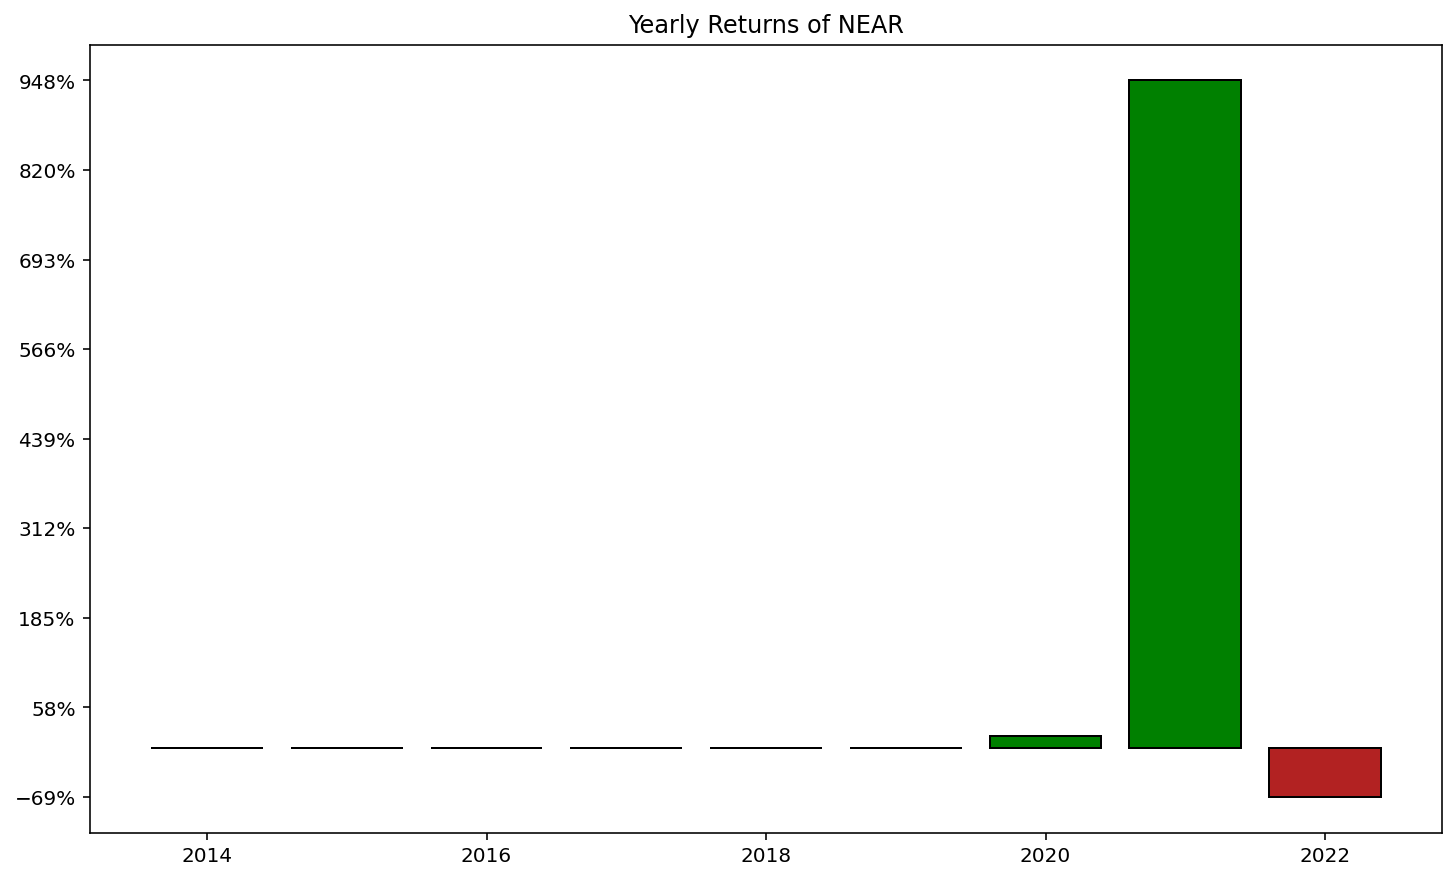

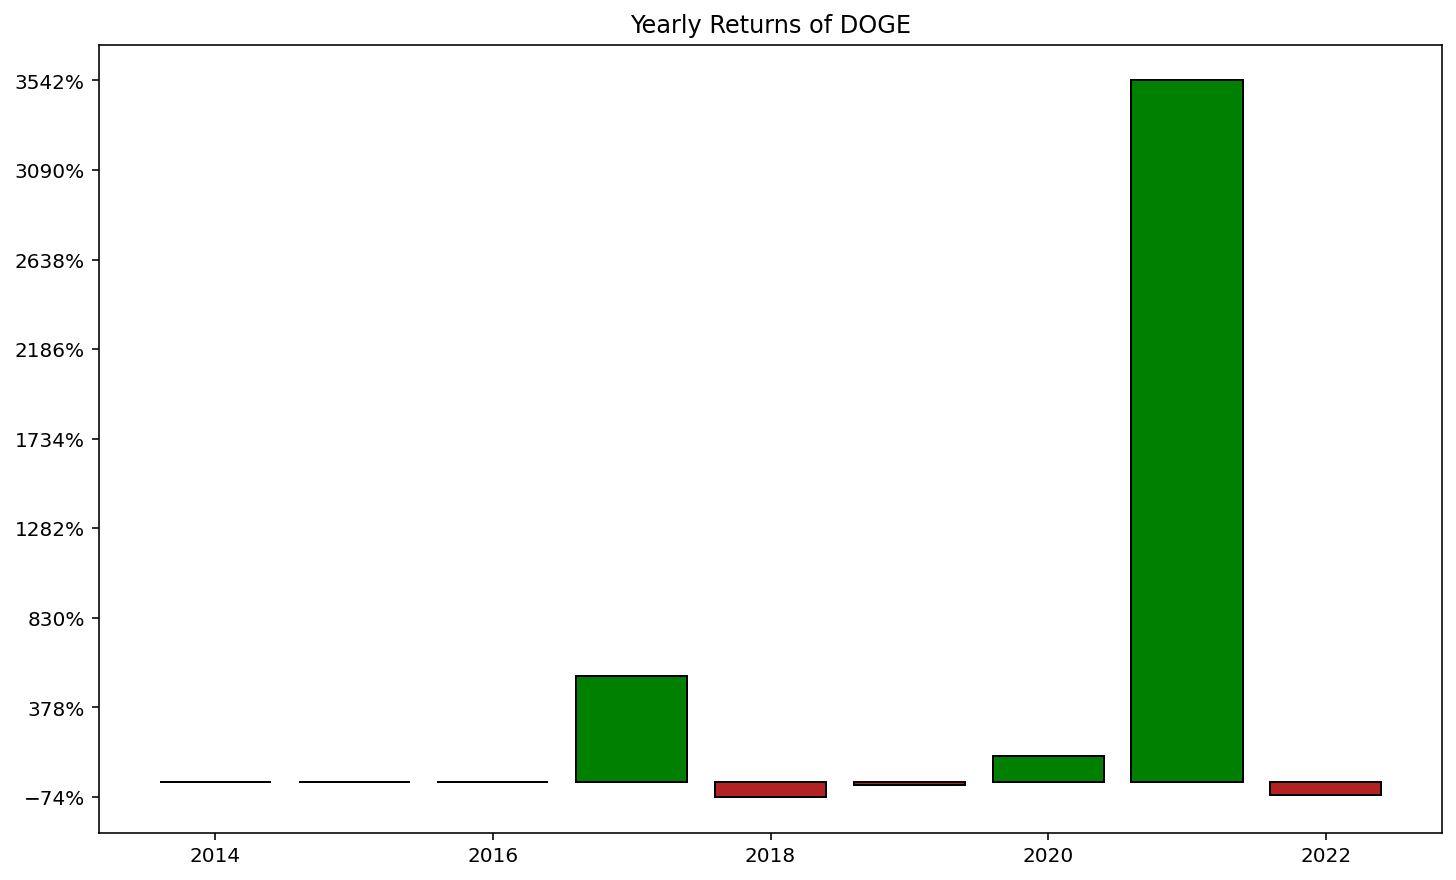

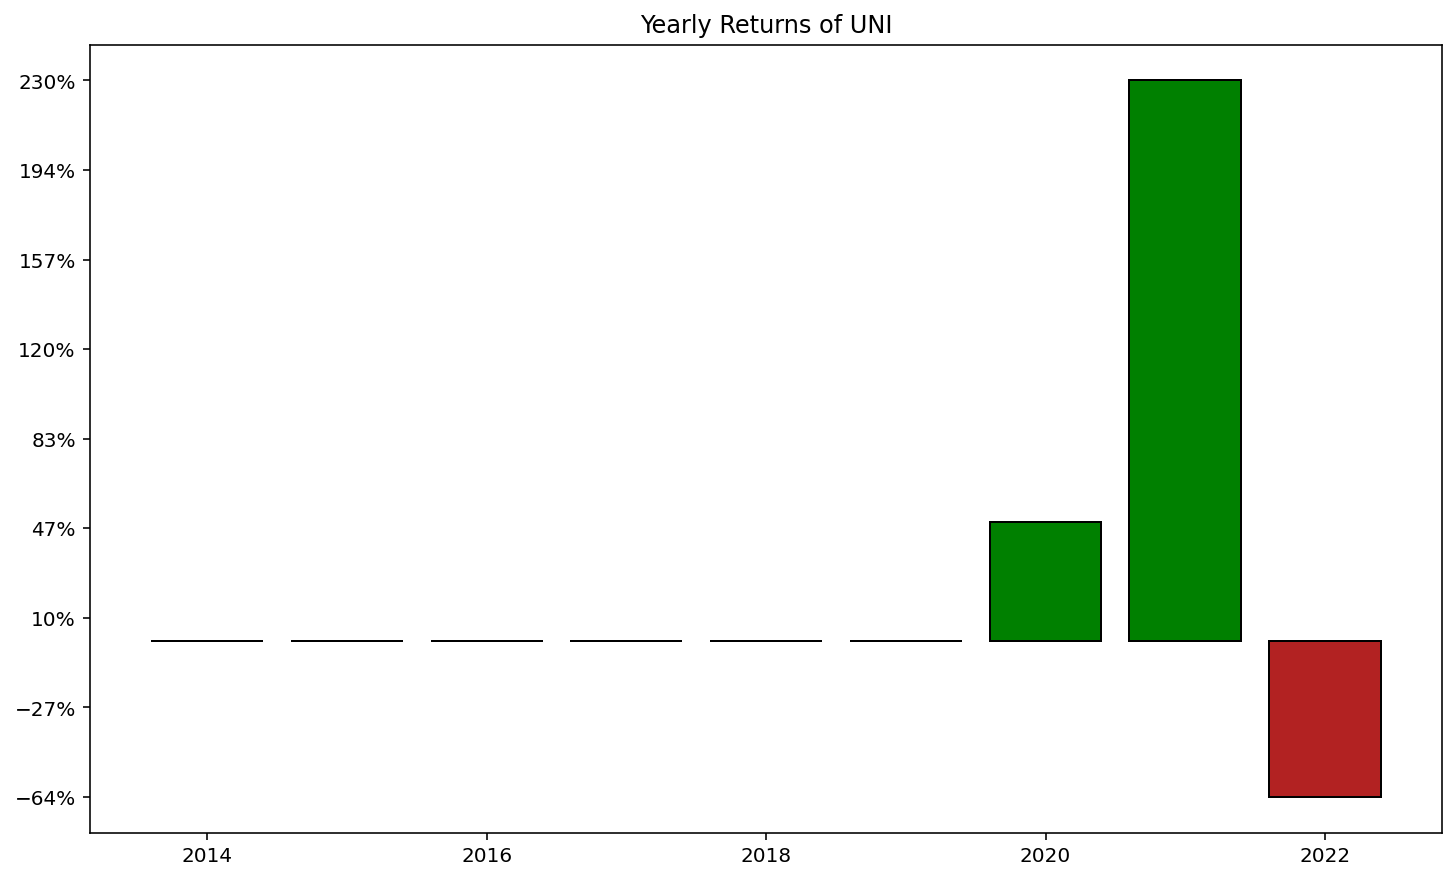

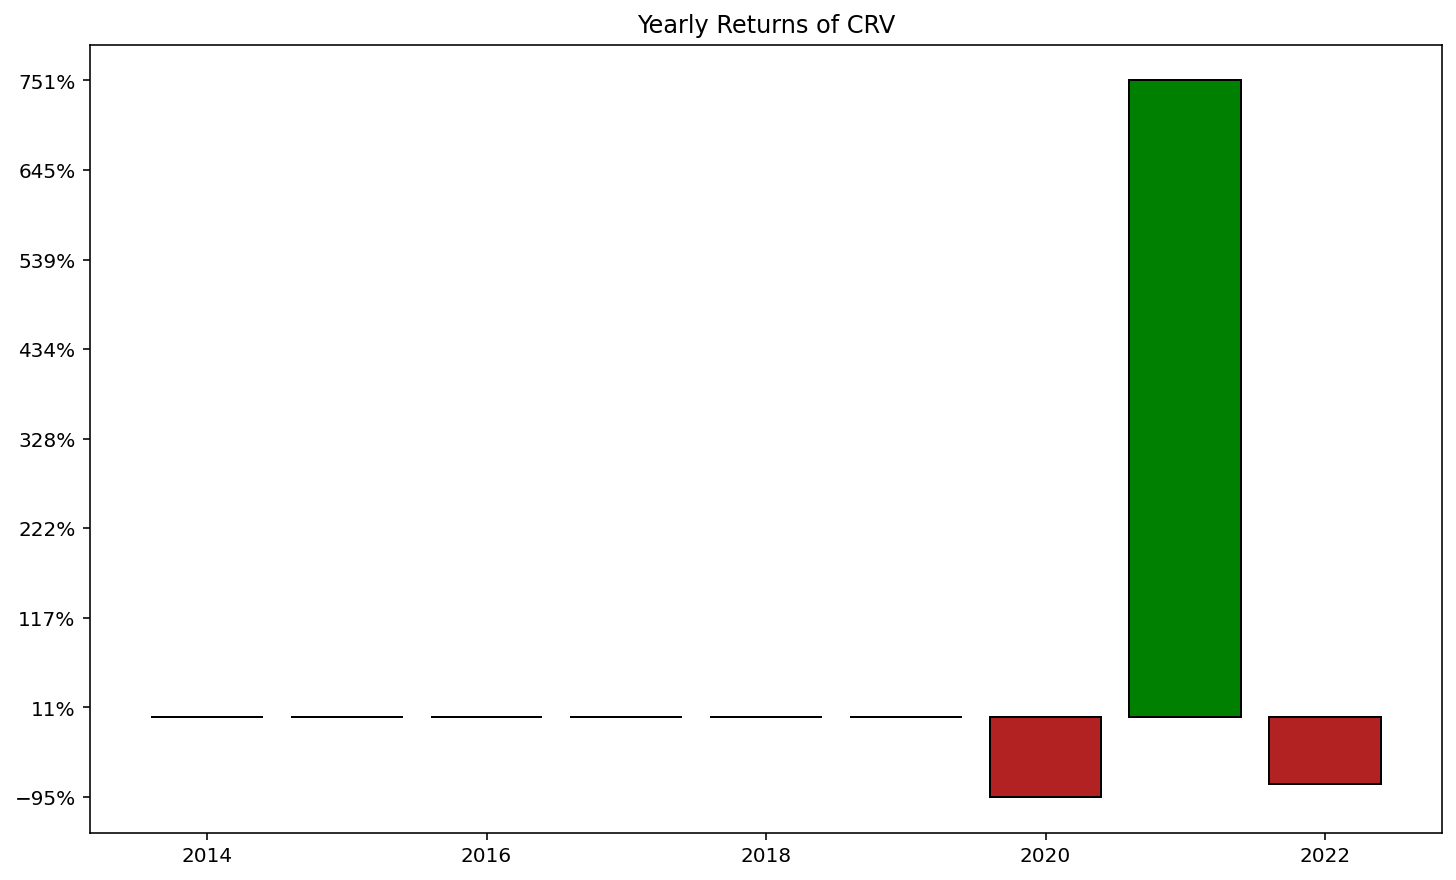

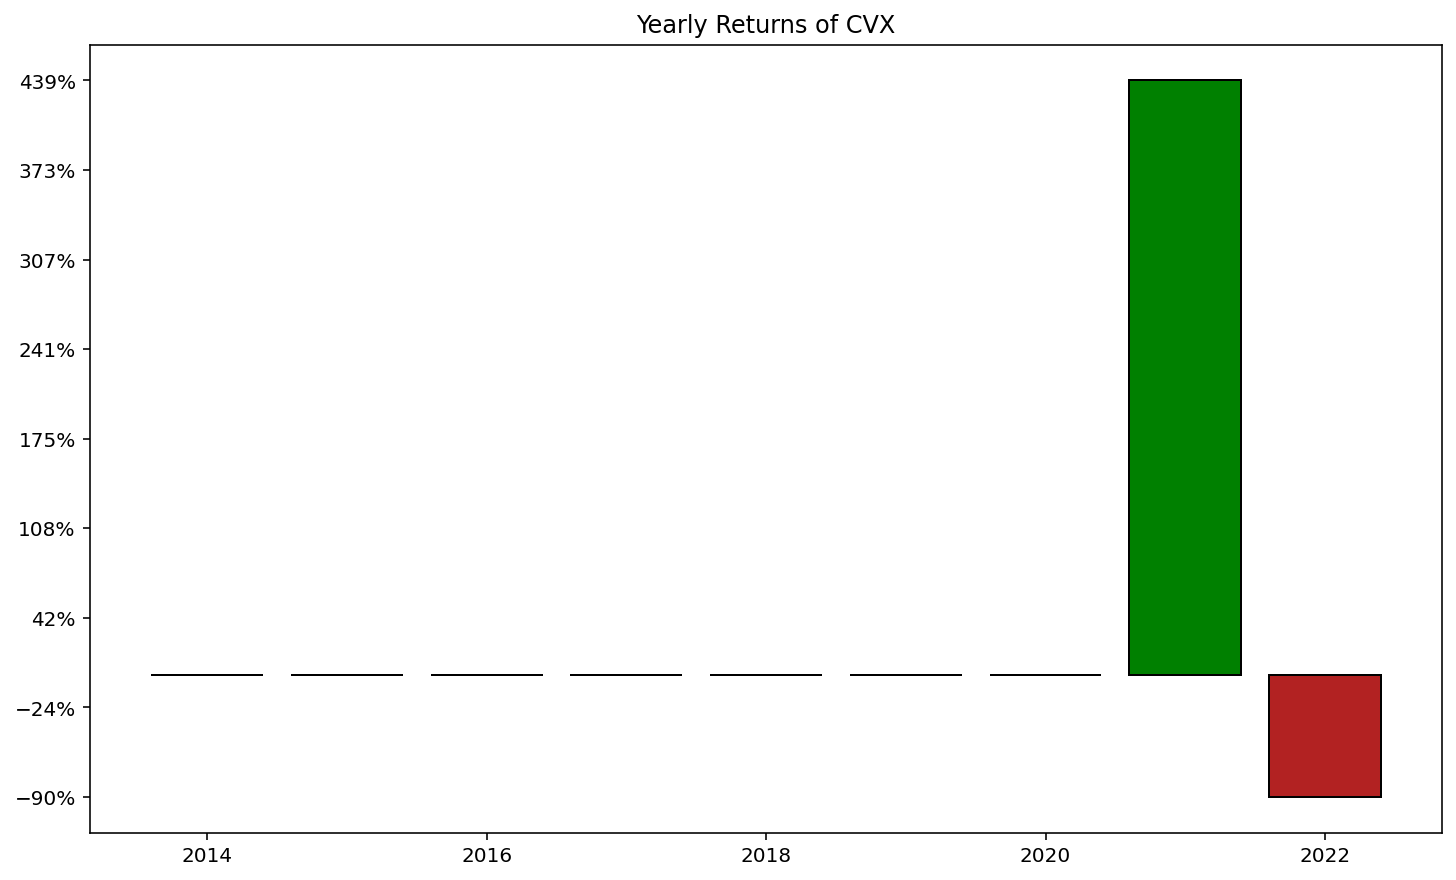

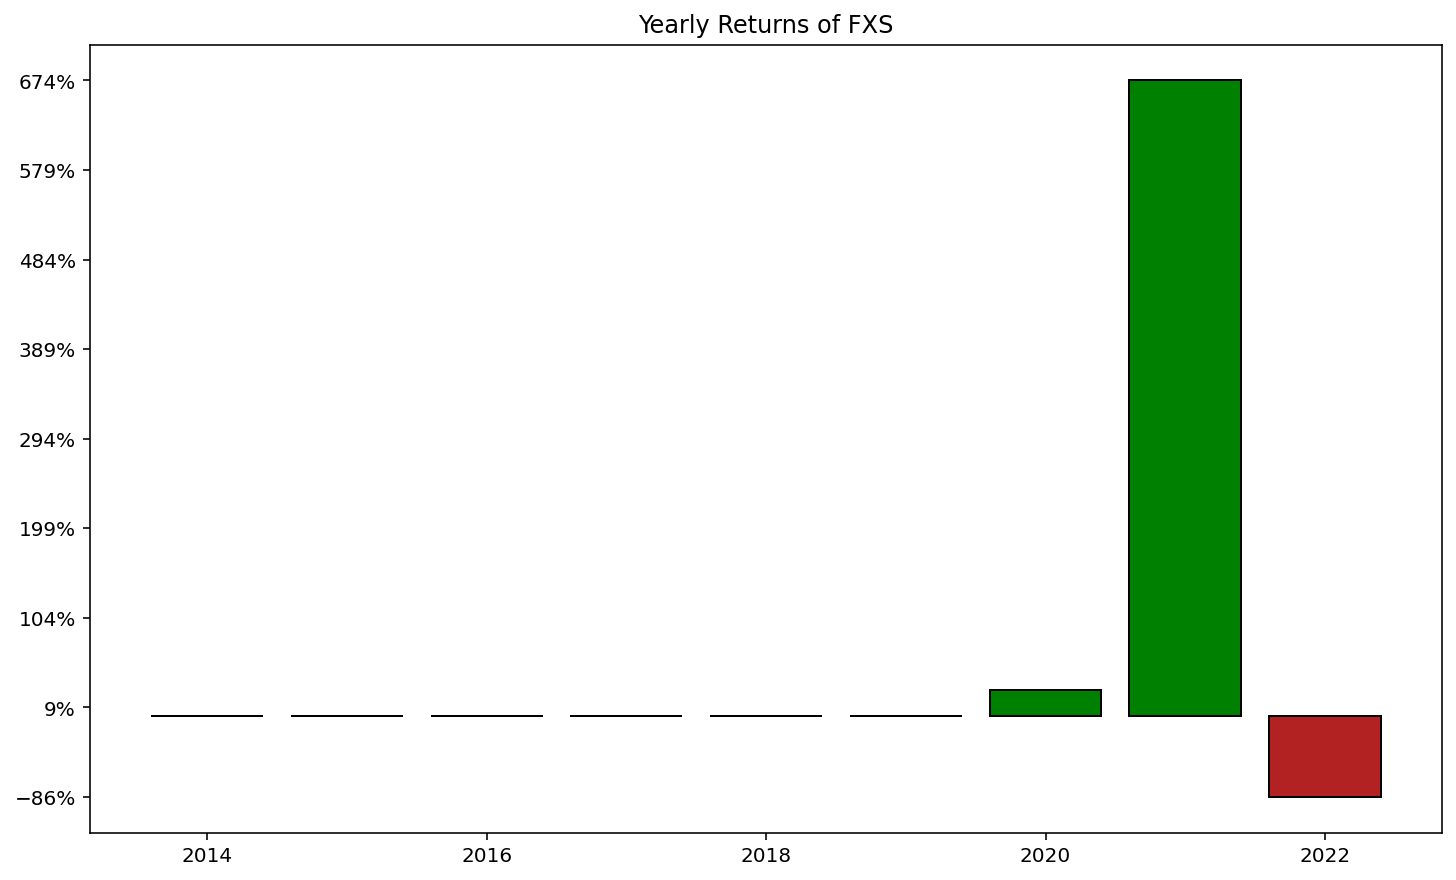

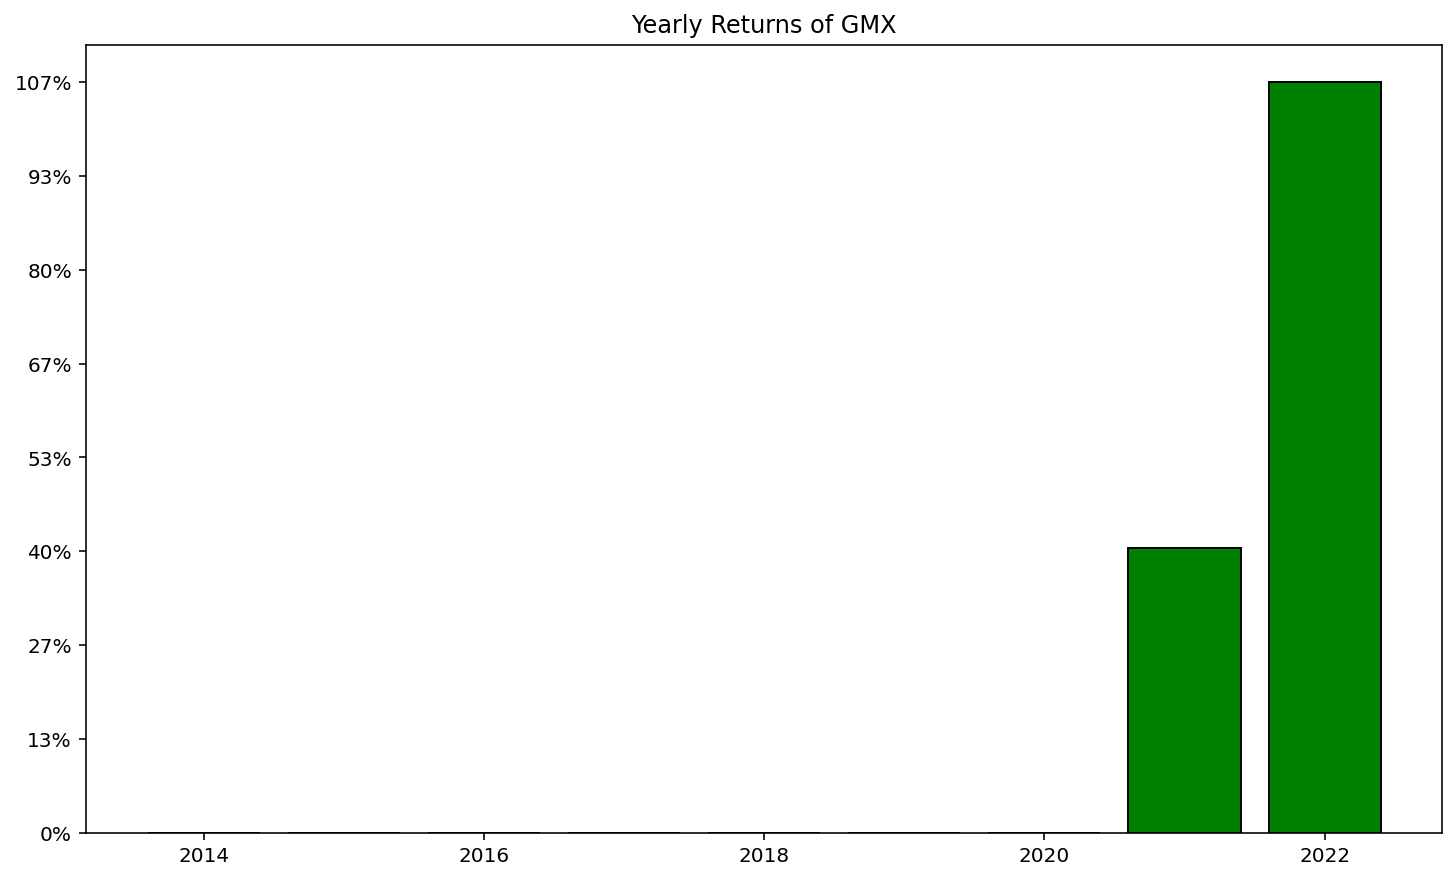

In [29]:
for yvar in returns.columns:
    y = returns[yvar]
    y.name = ''
    x = returns.index.year
    x.name = ''
    name = names[yvar]
    fig_tit = f'Yearly Returns of {name}'
    ax = mk_barplot(x, y, title=fig_tit)
    # plt.xticks(np.arange(min(x), max(x)+1, 1))
    # plt.savefig(os.path.join(png_dir, fig_tit+'.png'), dpi=300)